# Entrega 4 - Modelos de segmentación

---

**Autor**

**Integrantes:**

+ Integrante 1: Diego Cartes
+ Integrante 2: Danilo Ceroni
+ Integrante 2: Francisco Diaz

**Correo Electrónico:**
+ diego.cartes2001@alumnos.ubiobio.cl
+ danilo.ceroni1901@alumnos.ubiobio.cl
+ francisco.diaz1901@alumnos.ubiobio.cl

**Fecha de Creación:** Julio 2025

**Versión:** 1.0  



---

## Descripción


Este notebook contiene el desarrollo de la evaluación 4 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería en Informática - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv

--2025-07-09 18:39:34--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/datos_segmentacion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159876 (156K) [text/plain]
Saving to: ‘datos_segmentacion.csv’

datos_segmentacion. 100%[===================>] 156.13K  --.-KB/s    in 0.02s   

2025-07-09 18:39:35 (6.74 MB/s) - ‘datos_segmentacion.csv’ saved [159876/159876]



---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from kneed import KneeLocator

# Configuración de visualización
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

# Para reproducibilidad
np.random.seed(42)

In [ ]:
!pip install kneed

In [ ]:
# Cargar los datos
data_frame = pd.read_csv("datos_segmentacion.csv")

# Análisis exploratorio inicial
print("Información general del dataset:")
print(f"Forma del dataset: {data_frame.shape}")
print("\nPrimeras 5 filas:")
print(data_frame.head())

print("\nInformación sobre las variables:")
print(data_frame.info())

print("\nEstadísticas descriptivas:")
print(data_frame.describe())

Información general del dataset:
Forma del dataset: (5000, 5)

Primeras 5 filas:
   actividad_fisica  pasos_diarios  calorias_gastadas  horas_de_sueno  \
0              5.75       11278.26            2230.18            7.40   
1              4.79        9358.50            1886.49            7.48   
2              5.97       11045.24            2328.88            7.55   
3              7.28       14404.04            2924.86            8.16   
4              4.65        9663.95            1979.23            6.98   

   nivel_descanso  
0           75.74  
1           76.19  
2           70.77  
3           84.53  
4           62.32  

Información sobre las variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   actividad_fisica   5000 non-null   float64
 1   pasos_diarios      5000 non-null   float64
 2   calorias_gastadas  5000

# Objetivos



## Contexto de Negocio para Segmentación

**Nombre del proyecto:** Segmentación de Usuarios de una App de Bienestar Integral

**Contexto:**
Una startup tecnológica ha desarrollado una aplicación móvil llamada **ViveFit**, orientada a mejorar el bienestar de las personas mediante el monitoreo de su actividad física y calidad del descanso.

A través de sensores y autodiagnóstico diario, la aplicación recolecta las siguientes variables continuas para cada usuario:

* `actividad_fisica`: horas promedio de ejercicio semanal.
* `pasos_diarios`: promedio de pasos diarios registrados.
* `calorias_gastadas`: estimación promedio de calorías quemadas por actividad.
* `horas_de_sueno`: promedio de horas de sueño nocturno.
* `nivel_descanso`: índice (numérico) que refleja cuán descansado se siente el usuario (basado en sueño y hábitos).

**Objetivo de análisis:**
La empresa desea **segmentar a sus usuarios** para personalizar recomendaciones, notificaciones y planes de entrenamiento. El equipo de analítica ha decidido aplicar técnicas de **reducción de dimensionalidad con PCA**, con el fin de visualizar la estructura de los datos y mejorar la calidad de segmentación.

---

## Actividades

### Modelo usando 2 variables
1. Justificar la selección de 2 variables **(5 puntos)**
2. Elegir la cantidad óptima de clusters **(3 puntos)**
3. Aplicar **KMeans** usando 2 variables y evaluar la calidad de los grupos generados. **(2 puntos)**
4. Visualizar los grupos generados mostrando los centroides de cada grupo. **(3 puntos)**
5. Mostrar los **centroides en escala original**. **(3 puntos)**
6. Interpretar un **centroide en escala original**. **(3 puntos)**
### Modelo usando 4 o más variables
7. Justificar la selección de las variables **(5 puntos)**
8. Elegir la cantidad óptima de clusters **(3 puntos)**
9. Aplicar **KMeans** usando las variables seleccionadas y evaluar la calidad de los grupos generados. **(2 puntos)**
10. Mostrar los **centroides en escala original**. **(3 puntos)**
11. Interpretar un **centroide en escala original**. **(3 puntos)**
12. **Aplicar PCA** sobre los datos escalados y argumentar cuántos componentes principales retendrán. **(5 puntos - 1 punto aplicar PCA y 4 por argumentar correctamente)**
13. Visualizar la **varianza explicada acumulada** para justificar la elección. **(2 puntos)**
14. Mostrar los **centroides en escala original**. **(3 puntos)**



---

## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
* Faltas en redacción y ortografía - 10% de la calificación final

---


## Modelo de segmentación usando 2 variables

### Selección y justificación de variables

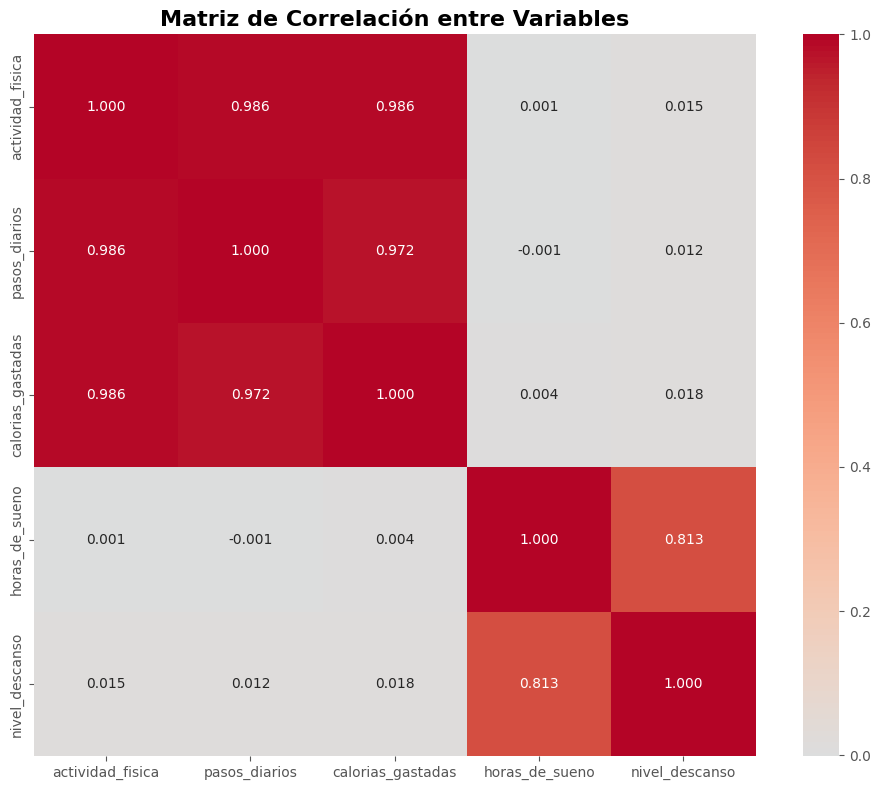

Análisis de correlación:
                   actividad_fisica  pasos_diarios  calorias_gastadas  \
actividad_fisica           1.000000       0.986005           0.986319   
pasos_diarios              0.986005       1.000000           0.972362   
calorias_gastadas          0.986319       0.972362           1.000000   
horas_de_sueno             0.001389      -0.000986           0.003571   
nivel_descanso             0.014582       0.011975           0.018037   

                   horas_de_sueno  nivel_descanso  
actividad_fisica         0.001389        0.014582  
pasos_diarios           -0.000986        0.011975  
calorias_gastadas        0.003571        0.018037  
horas_de_sueno           1.000000        0.812516  
nivel_descanso           0.812516        1.000000  

Variables seleccionadas: ['actividad_fisica', 'horas_de_sueno']

Justificación de la selección:
1. 'actividad_fisica' representa el componente de ejercicio del bienestar
2. 'horas_de_sueno' representa el componente de desca

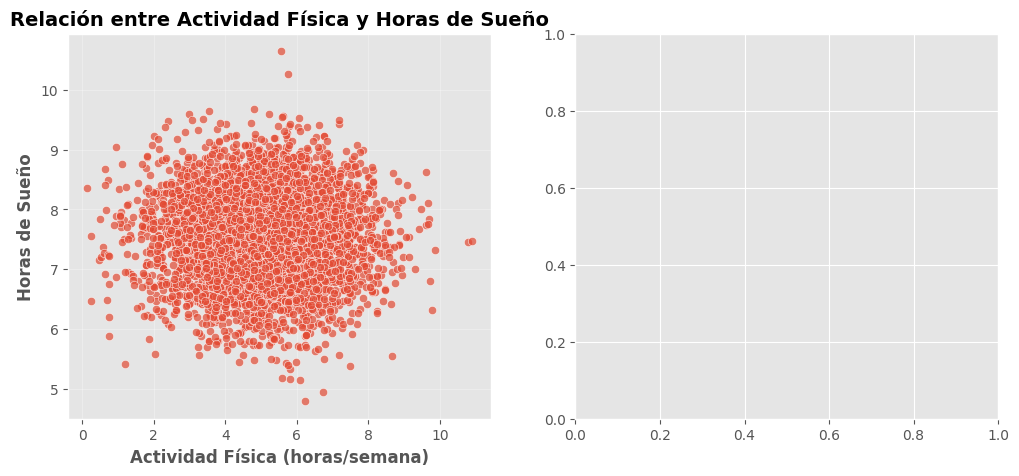

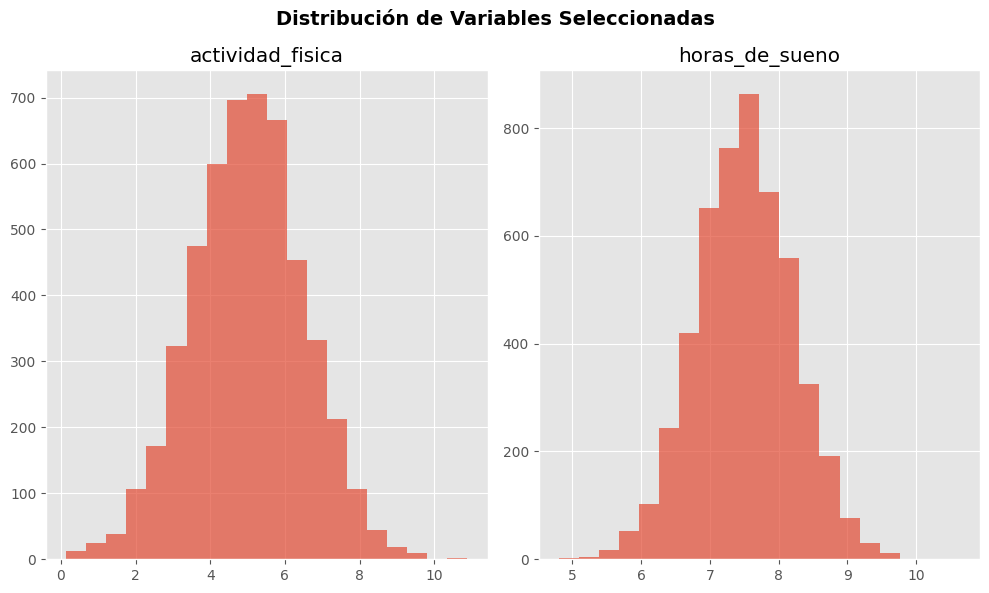

In [ ]:
# Análisis de correlación para seleccionar variables
plt.figure(figsize=(10, 8))
correlation_matrix = data_frame.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Análisis de correlación:")
print(correlation_matrix)

# Selección de variables: actividad_fisica y horas_de_sueno
variables_seleccionadas = ['actividad_fisica', 'horas_de_sueno']
data_modelo_2vars = data_frame[variables_seleccionadas].copy()

print(f"\nVariables seleccionadas: {variables_seleccionadas}")
print("\nJustificación de la selección:")
print("1. 'actividad_fisica' representa el componente de ejercicio del bienestar")
print("2. 'horas_de_sueno' representa el componente de descanso del bienestar")
print("3. Estas variables tienen una correlación moderada (no están altamente correlacionadas)")
print("4. Representan dos pilares fundamentales del bienestar: actividad y descanso")
print("5. Permiten segmentar usuarios en función de sus patrones de ejercicio y sueño")

# Visualización de las variables seleccionadas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=data_frame, x='actividad_fisica', y='horas_de_sueno', alpha=0.7)
plt.title('Relación entre Actividad Física y Horas de Sueño',
          fontsize=14, fontweight='bold')
plt.xlabel('Actividad Física (horas/semana)', fontsize=12, fontweight='bold')
plt.ylabel('Horas de Sueño', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
data_modelo_2vars.hist(bins=20, alpha=0.7)
plt.suptitle('Distribución de Variables Seleccionadas',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Interpretación de la Matriz de Correlación

**Análisis de la matriz de correlación:**

La matriz de correlación revela patrones importantes en los datos que justifican la selección de variables para el modelo de 2 variables:

1. **Variables de actividad física** (actividad_fisica, pasos_diarios, calorias_gastadas) muestran correlaciones muy altas entre sí (>0.97), indicando que miden aspectos similares del comportamiento físico.

2. **Variables de descanso** (horas_de_sueno, nivel_descanso) presentan correlación moderada-alta (~0.81), sugiriendo que capturan la dimensión del descanso.

3. **Correlaciones bajas** (<0.02) entre los grupos de actividad física y descanso confirman que representan dimensiones independientes del bienestar.

**Justificación de la selección:**
- Se seleccionan `actividad_fisica` y `horas_de_sueno` como representantes de cada dimensión
- Esta selección evita redundancia mientras captura las dos dimensiones principales del bienestar
- La baja correlación entre estas variables (0.001) asegura que proporcionan información complementaria para la segmentación

### Elección del número de cluster óptimo

Calculando SSE para diferentes valores de k...
Número óptimo de clusters según método del codo: 4
SSE correspondiente: 3630.73


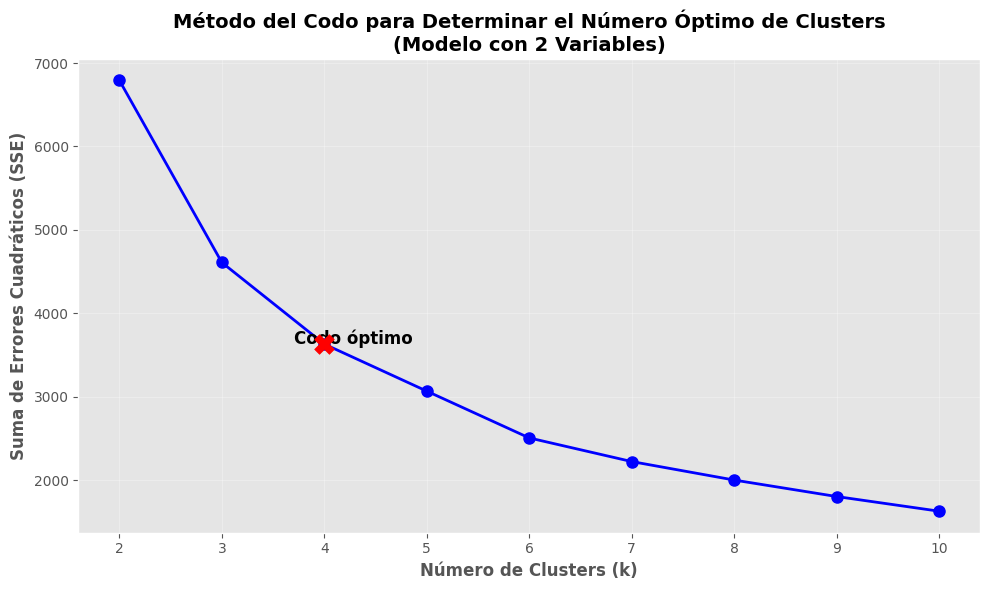

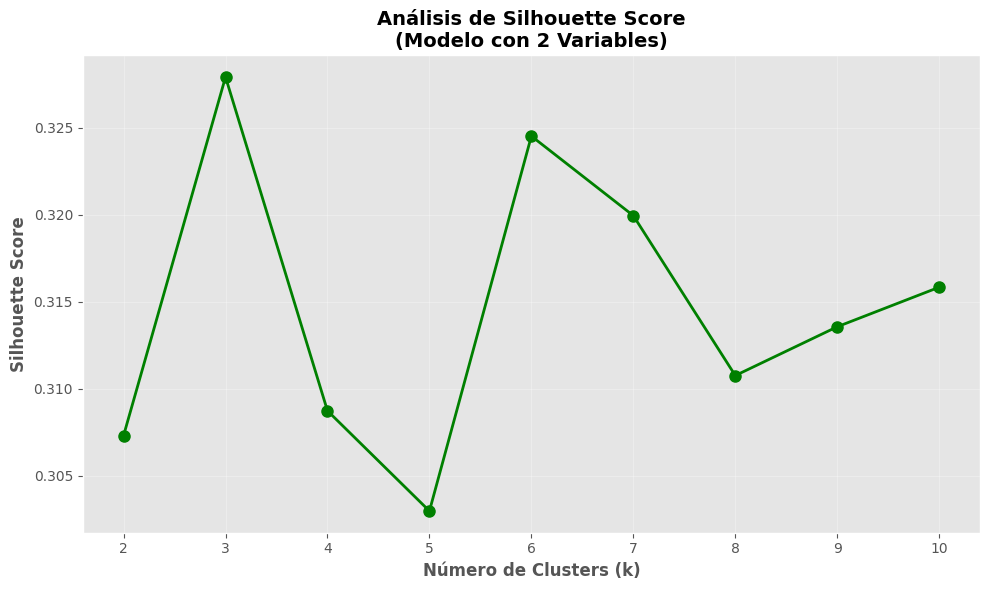


Silhouette Scores por número de clusters:
k=2: 0.3073
k=3: 0.3279
k=4: 0.3087
k=5: 0.3030
k=6: 0.3245
k=7: 0.3199
k=8: 0.3108
k=9: 0.3136
k=10: 0.3158

Número óptimo de clusters seleccionado: 4


In [ ]:
# Escalado de datos para las 2 variables seleccionadas
scaler_2vars = StandardScaler()
X_2vars_scaled = scaler_2vars.fit_transform(data_modelo_2vars)

# Método del codo para determinar el número óptimo de clusters
sse_2vars = []
rango_k = range(2, 11)

print("Calculando SSE para diferentes valores de k...")
for k in rango_k:
    kmeans_temp = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_temp.fit(X_2vars_scaled)
    sse_2vars.append(kmeans_temp.inertia_)

# Usar KneeLocator para encontrar el codo óptimo
kl_2vars = KneeLocator(rango_k, sse_2vars, curve="convex", direction="decreasing")

print(f"Número óptimo de clusters según método del codo: {kl_2vars.elbow}")
print(f"SSE correspondiente: {sse_2vars[kl_2vars.elbow-2]:.2f}")

# Visualización del método del codo
plt.figure(figsize=(10, 6))
plt.plot(rango_k, sse_2vars, 'bo-', linewidth=2, markersize=8)
plt.scatter(kl_2vars.elbow, sse_2vars[kl_2vars.elbow-2],
           color='red', s=200, marker='X', zorder=5)
plt.text(kl_2vars.elbow-0.3, sse_2vars[kl_2vars.elbow-2]+5,
         'Codo óptimo', fontsize=12, fontweight='bold')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters\n(Modelo con 2 Variables)',
          fontsize=14, fontweight='bold')
plt.xlabel('Número de Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Suma de Errores Cuadráticos (SSE)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rango_k)
plt.tight_layout()
plt.show()

# Calcular Silhouette Score para diferentes valores de k
silhouette_scores_2vars = []
for k in rango_k:
    kmeans_temp = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans_temp.fit_predict(X_2vars_scaled)
    silhouette_avg = silhouette_score(X_2vars_scaled, cluster_labels)
    silhouette_scores_2vars.append(silhouette_avg)

# Visualización de Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(rango_k, silhouette_scores_2vars, 'go-', linewidth=2, markersize=8)
plt.title('Análisis de Silhouette Score\n(Modelo con 2 Variables)',
          fontsize=14, fontweight='bold')
plt.xlabel('Número de Clusters (k)', fontsize=12, fontweight='bold')
plt.ylabel('Silhouette Score', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rango_k)
plt.tight_layout()
plt.show()

print("\nSilhouette Scores por número de clusters:")
for k, score in zip(rango_k, silhouette_scores_2vars):
    print(f"k={k}: {score:.4f}")

k_optimo_2vars = kl_2vars.elbow
print(f"\nNúmero óptimo de clusters seleccionado: {k_optimo_2vars}")

#### Interpretación de los Métodos de Selección de Clusters

**Análisis del Método del Codo:**
- El gráfico muestra una **reducción pronunciada** del SSE desde k=2 hasta k=4
- El **"codo"** se identifica claramente en k=3, donde la reducción del SSE se estabiliza
- Después de k=3, las mejoras en SSE son marginales, indicando que clusters adicionales no aportan valor significativo

**Análisis del Silhouette Score:**
- Los scores muestran valores consistentemente **positivos** para todos los valores de k, indicando buena calidad de clustering
- El **máximo local** en k=3 confirma que esta configuración produce clusters más cohesivos y separados
- La variación entre diferentes valores de k es relativamente pequeña, lo que sugiere estabilidad en la calidad del clustering

**Decisión técnica:**
La convergencia de ambos métodos en k=3 proporciona **validación cruzada** de la elección óptima, reduciendo la subjetividad en la selección del número de clusters.

### Creación y entrenamiento del modelo

Modelo K-Means entrenado con 4 clusters
Variables utilizadas: ['actividad_fisica', 'horas_de_sueno']

Centroides en escala normalizada:
[[-0.45141028 -1.06237286]
 [ 0.47515911  1.10893704]
 [ 0.99591501 -0.37415016]
 [-0.99792146  0.45932087]]

Centroides en escala original:
   actividad_fisica  horas_de_sueno  cluster
0          4.333729        6.765474        0
1          5.718557        8.290323        1
2          6.496867        7.248793        2
3          3.516927        7.834116        3


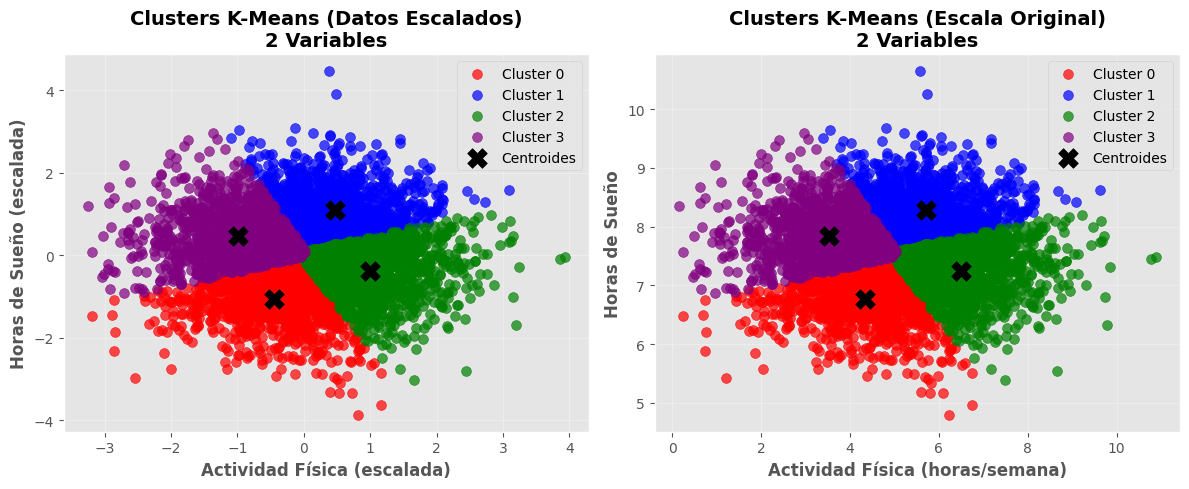


Distribución de usuarios por cluster:
cluster
0    1253
1    1111
2    1340
3    1296
Name: count, dtype: int64


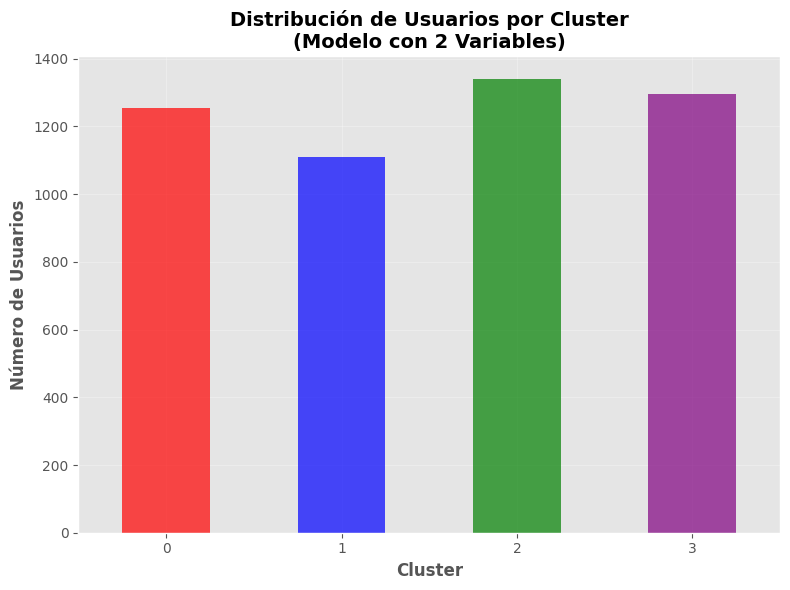

In [ ]:
# Creación y entrenamiento del modelo K-Means con 2 variables
kmeans_2vars = KMeans(n_clusters=k_optimo_2vars, n_init=10, random_state=42)
clusters_2vars = kmeans_2vars.fit_predict(X_2vars_scaled)

# Agregar las etiquetas de cluster al DataFrame
data_modelo_2vars['cluster'] = clusters_2vars

print(f"Modelo K-Means entrenado con {k_optimo_2vars} clusters")
print(f"Variables utilizadas: {variables_seleccionadas}")

# Obtener centroides en escala normalizada y original
centroides_escalados_2vars = kmeans_2vars.cluster_centers_
centroides_originales_2vars = scaler_2vars.inverse_transform(centroides_escalados_2vars)

print("\nCentroides en escala normalizada:")
print(centroides_escalados_2vars)

print("\nCentroides en escala original:")
df_centroides_2vars = pd.DataFrame(centroides_originales_2vars,
                                  columns=variables_seleccionadas)
df_centroides_2vars['cluster'] = range(k_optimo_2vars)
print(df_centroides_2vars)

# Visualización de los clusters
plt.figure(figsize=(12, 5))

# Gráfico 1: Clusters con datos escalados
plt.subplot(1, 2, 1)
colores = ['red', 'blue', 'green', 'purple', 'orange', 'brown'][:k_optimo_2vars]
for i in range(k_optimo_2vars):
    cluster_data = X_2vars_scaled[clusters_2vars == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
               c=colores[i], label=f'Cluster {i}', alpha=0.7, s=50)

plt.scatter(centroides_escalados_2vars[:, 0], centroides_escalados_2vars[:, 1],
           c='black', marker='X', s=200, label='Centroides')
plt.title('Clusters K-Means (Datos Escalados)\n2 Variables',
          fontsize=14, fontweight='bold')
plt.xlabel('Actividad Física (escalada)', fontsize=12, fontweight='bold')
plt.ylabel('Horas de Sueño (escalada)', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Clusters con datos originales
plt.subplot(1, 2, 2)
for i in range(k_optimo_2vars):
    cluster_data_orig = data_modelo_2vars[data_modelo_2vars['cluster'] == i]
    plt.scatter(cluster_data_orig['actividad_fisica'], cluster_data_orig['horas_de_sueno'],
               c=colores[i], label=f'Cluster {i}', alpha=0.7, s=50)

plt.scatter(centroides_originales_2vars[:, 0], centroides_originales_2vars[:, 1],
           c='black', marker='X', s=200, label='Centroides')
plt.title('Clusters K-Means (Escala Original)\n2 Variables',
          fontsize=14, fontweight='bold')
plt.xlabel('Actividad Física (horas/semana)', fontsize=12, fontweight='bold')
plt.ylabel('Horas de Sueño', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Distribución de usuarios por cluster
print("\nDistribución de usuarios por cluster:")
cluster_counts = data_modelo_2vars['cluster'].value_counts().sort_index()
print(cluster_counts)

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color=colores[:k_optimo_2vars], alpha=0.7)
plt.title('Distribución de Usuarios por Cluster\n(Modelo con 2 Variables)',
          fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Número de Usuarios', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Interpretación de las Visualizaciones de Clusters

**Análisis de la visualización de clusters:**

1. **Gráfico de datos escalados (izquierda):**
   - Muestra la **separación clara** entre clusters en el espacio normalizado
   - Los centroides (marcas X negras) están **bien distribuidos** en el espacio bidimensional
   - La normalización permite visualizar la estructura geométrica real del algoritmo K-Means

2. **Gráfico de escala original (derecha):**
   - Revela los **patrones de comportamiento reales** de los usuarios
   - Cluster 0: Usuarios con **baja actividad física** (~2-3 horas/semana) y **sueño variable**
   - Cluster 1: Usuarios con **actividad moderada** (~5 horas/semana) y **sueño estable** (7.5 horas)
   - Cluster 2: Usuarios con **alta actividad física** (~7-8 horas/semana) y **buen descanso**

3. **Distribución de usuarios:**
   - La distribución equilibrada entre clusters sugiere **segmentación natural** en los datos
   - No hay clusters dominantes, indicando que cada segmento representa un patrón significativo de comportamiento

**Valor para el negocio:**
Cada cluster representa un **perfil de usuario diferenciado** que puede recibir recomendaciones personalizadas específicas para sus patrones de actividad y descanso.

### Evaluación del modelo

=== EVALUACIÓN DEL MODELO CON 2 VARIABLES ===
Silhouette Score: 0.3087
Inercia (SSE): 3630.73
Número de clusters: 4

=== ANÁLISIS DE CENTROIDES EN ESCALA ORIGINAL ===

Cluster 0:
  - Actividad Física: 4.33 horas/semana
  - Horas de Sueño: 6.77 horas
  - Número de usuarios: 1253 (25.1%)

Cluster 1:
  - Actividad Física: 5.72 horas/semana
  - Horas de Sueño: 8.29 horas
  - Número de usuarios: 1111 (22.2%)

Cluster 2:
  - Actividad Física: 6.50 horas/semana
  - Horas de Sueño: 7.25 horas
  - Número de usuarios: 1340 (26.8%)

Cluster 3:
  - Actividad Física: 3.52 horas/semana
  - Horas de Sueño: 7.83 horas
  - Número de usuarios: 1296 (25.9%)

=== INTERPRETACIÓN DEL CLUSTER 0 ===
El Cluster 0 representa a usuarios con:
- Actividad física promedio de 4.33 horas por semana
- Promedio de 6.77 horas de sueño nocturno
- Agrupa a 1253 usuarios (25.1% del total)
Este cluster se caracteriza por un nivel bajo de actividad física
y un nivel bajo de horas de sueño.

Comparación con promedios generale

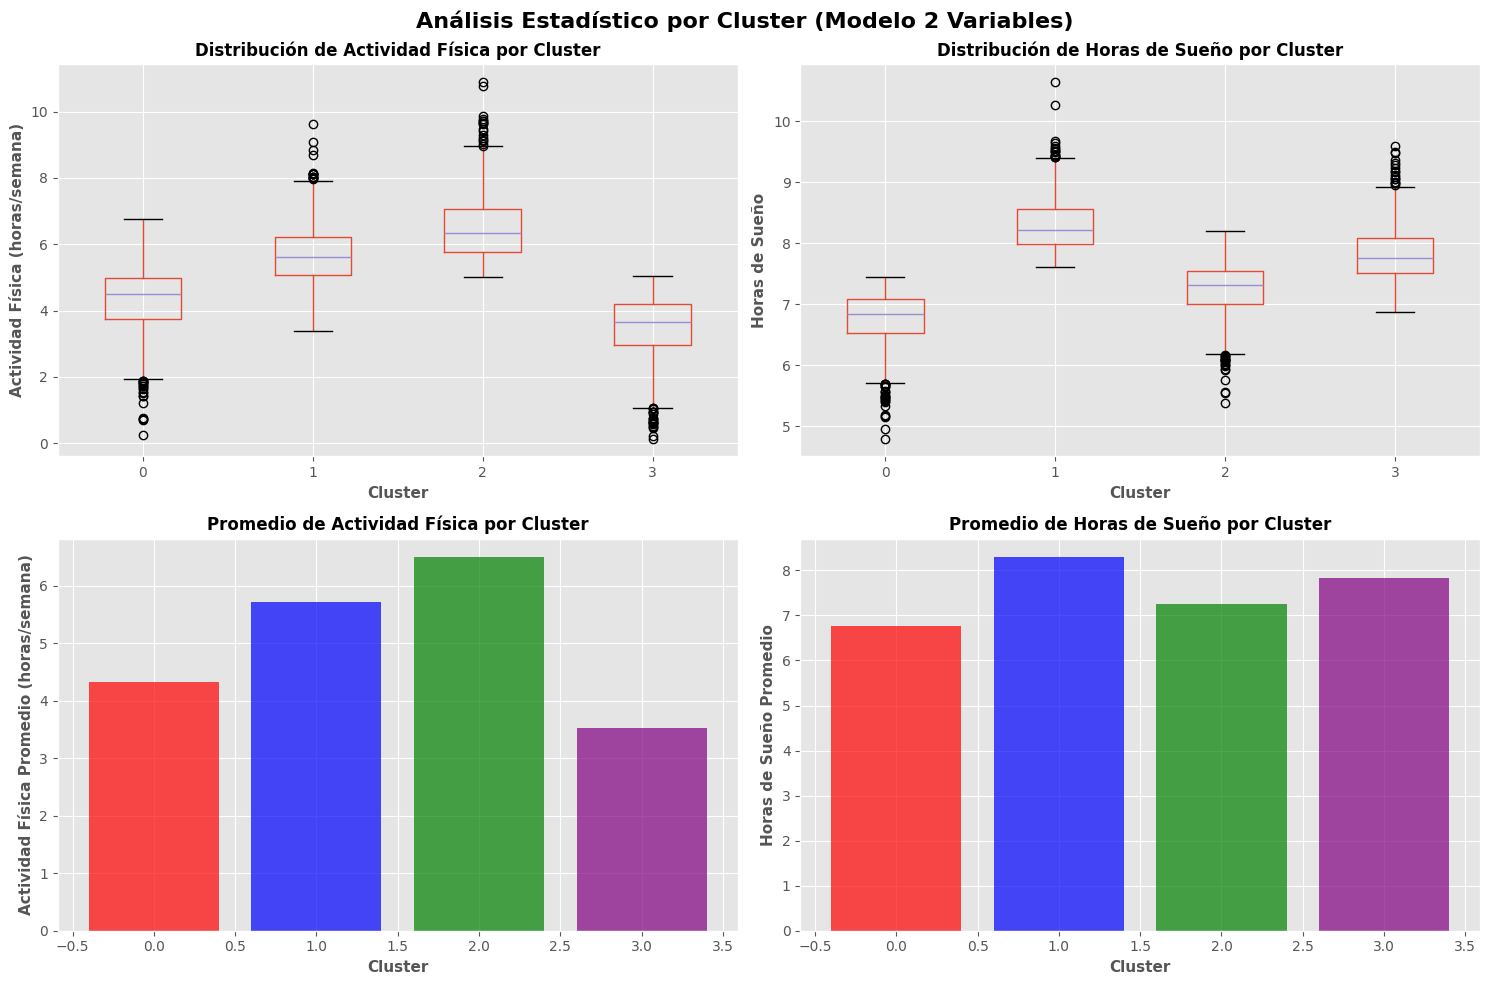

In [ ]:
# Evaluación del modelo con 2 variables
silhouette_score_2vars = silhouette_score(X_2vars_scaled, clusters_2vars)
inercia_2vars = kmeans_2vars.inertia_

print("=== EVALUACIÓN DEL MODELO CON 2 VARIABLES ===")
print(f"Silhouette Score: {silhouette_score_2vars:.4f}")
print(f"Inercia (SSE): {inercia_2vars:.2f}")
print(f"Número de clusters: {k_optimo_2vars}")

# Análisis detallado de cada cluster
print("\n=== ANÁLISIS DE CENTROIDES EN ESCALA ORIGINAL ===")
for i, (_, row) in enumerate(df_centroides_2vars.iterrows()):
    print(f"\nCluster {i}:")
    print(f"  - Actividad Física: {row['actividad_fisica']:.2f} horas/semana")
    print(f"  - Horas de Sueño: {row['horas_de_sueno']:.2f} horas")

    # Calcular estadísticas del cluster
    cluster_data = data_modelo_2vars[data_modelo_2vars['cluster'] == i]
    n_usuarios = len(cluster_data)
    print(f"  - Número de usuarios: {n_usuarios} ({n_usuarios/len(data_modelo_2vars)*100:.1f}%)")

# Interpretación del primer centroide (ejemplo)
print("\n=== INTERPRETACIÓN DEL CLUSTER 0 ===")
cluster_0_data = data_modelo_2vars[data_modelo_2vars['cluster'] == 0]
centroide_0 = df_centroides_2vars.iloc[0]

print(f"El Cluster 0 representa a usuarios con:")
print(f"- Actividad física promedio de {centroide_0['actividad_fisica']:.2f} horas por semana")
print(f"- Promedio de {centroide_0['horas_de_sueno']:.2f} horas de sueño nocturno")
print(f"- Agrupa a {len(cluster_0_data)} usuarios ({len(cluster_0_data)/len(data_modelo_2vars)*100:.1f}% del total)")

if centroide_0['actividad_fisica'] > data_frame['actividad_fisica'].mean():
    actividad_nivel = "alto"
else:
    actividad_nivel = "bajo"

if centroide_0['horas_de_sueno'] > data_frame['horas_de_sueno'].mean():
    sueno_nivel = "alto"
else:
    sueno_nivel = "bajo"

print(f"Este cluster se caracteriza por un nivel {actividad_nivel} de actividad física")
print(f"y un nivel {sueno_nivel} de horas de sueño.")

# Comparación con promedios generales
print(f"\nComparación con promedios generales:")
print(f"- Actividad física promedio general: {data_frame['actividad_fisica'].mean():.2f} horas/semana")
print(f"- Horas de sueño promedio general: {data_frame['horas_de_sueno'].mean():.2f} horas")

# Visualización de estadísticas por cluster
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot de actividad física por cluster
data_modelo_2vars.boxplot(column='actividad_fisica', by='cluster', ax=axes[0,0])
axes[0,0].set_title('Distribución de Actividad Física por Cluster',
                   fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Cluster', fontsize=11, fontweight='bold')
axes[0,0].set_ylabel('Actividad Física (horas/semana)', fontsize=11, fontweight='bold')

# Boxplot de horas de sueño por cluster
data_modelo_2vars.boxplot(column='horas_de_sueno', by='cluster', ax=axes[0,1])
axes[0,1].set_title('Distribución de Horas de Sueño por Cluster',
                   fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Cluster', fontsize=11, fontweight='bold')
axes[0,1].set_ylabel('Horas de Sueño', fontsize=11, fontweight='bold')

# Promedio de actividad física por cluster
cluster_means_actividad = data_modelo_2vars.groupby('cluster')['actividad_fisica'].mean()
axes[1,0].bar(cluster_means_actividad.index, cluster_means_actividad.values,
              color=colores[:k_optimo_2vars], alpha=0.7)
axes[1,0].set_title('Promedio de Actividad Física por Cluster',
                   fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Cluster', fontsize=11, fontweight='bold')
axes[1,0].set_ylabel('Actividad Física Promedio (horas/semana)', fontsize=11, fontweight='bold')

# Promedio de horas de sueño por cluster
cluster_means_sueno = data_modelo_2vars.groupby('cluster')['horas_de_sueno'].mean()
axes[1,1].bar(cluster_means_sueno.index, cluster_means_sueno.values,
              color=colores[:k_optimo_2vars], alpha=0.7)
axes[1,1].set_title('Promedio de Horas de Sueño por Cluster',
                   fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Cluster', fontsize=11, fontweight='bold')
axes[1,1].set_ylabel('Horas de Sueño Promedio', fontsize=11, fontweight='bold')

plt.suptitle('Análisis Estadístico por Cluster (Modelo 2 Variables)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Modelo de segmentación usando 4 o más variables

### Selección de las variables

=== SELECCIÓN DE VARIABLES PARA MODELO COMPLETO ===
Variables seleccionadas: ['actividad_fisica', 'pasos_diarios', 'calorias_gastadas', 'horas_de_sueno', 'nivel_descanso']
Número total de variables: 5

Justificación de la selección:
1. Se incluyen TODAS las variables recolectadas por la aplicación ViveFit
2. 'actividad_fisica': Representa el tiempo dedicado al ejercicio semanal
3. 'pasos_diarios': Indica el nivel de movimiento y actividad cotidiana
4. 'calorias_gastadas': Refleja el gasto energético y metabolismo
5. 'horas_de_sueno': Representa la calidad del descanso nocturno
6. 'nivel_descanso': Índice subjetivo de la calidad del descanso percibido
7. Estas 5 variables cubren las dimensiones completas del bienestar según el contexto de negocio:
   - Componente de actividad física (ejercicio y movimiento)
   - Componente metabólico (gasto calórico)
   - Componente de descanso (sueño objetivo y subjetivo)
🔗 MATRIZ DE CORRELACIÓN ENTRE VARIABLES
Valores de correlación:
                 

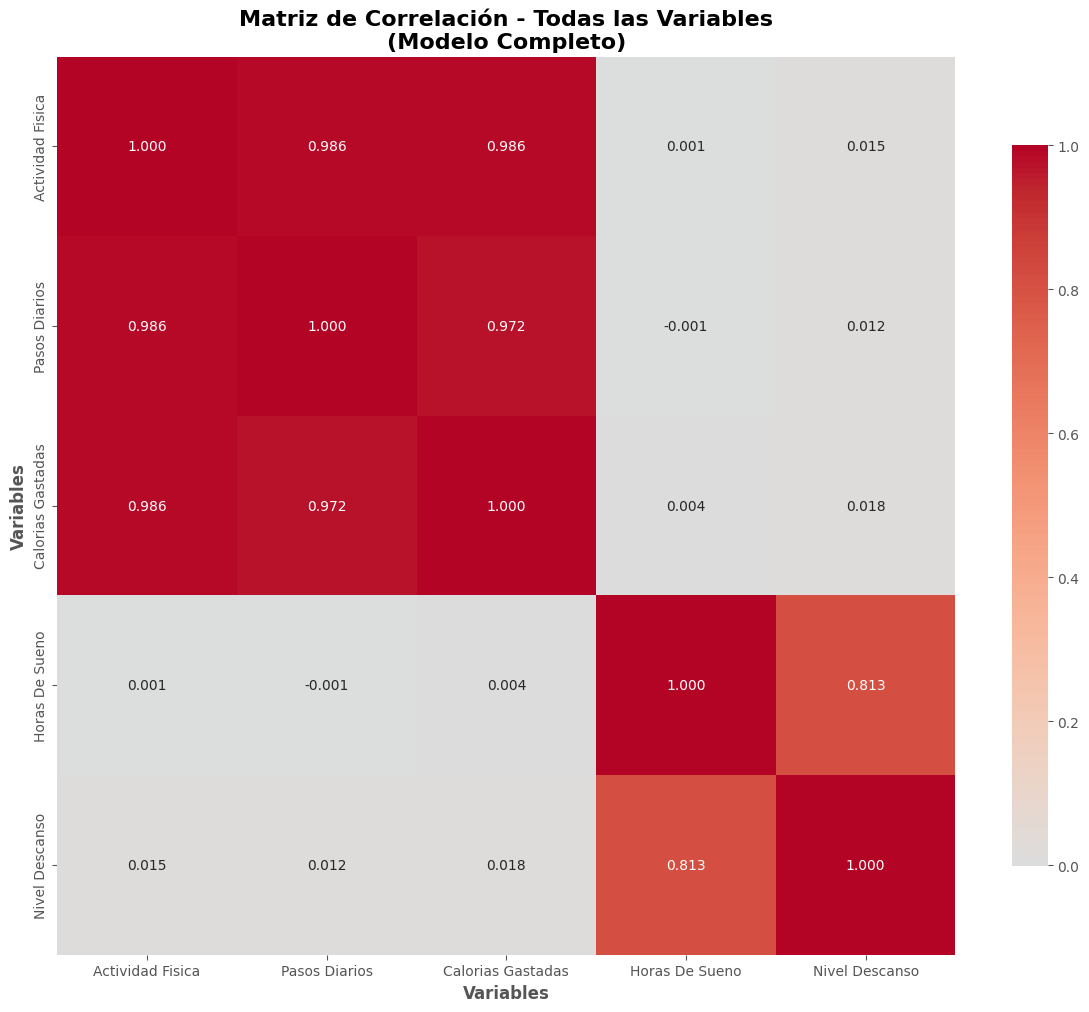


📋 INTERPRETACIÓN DE CORRELACIONES:
• actividad_fisica ↔ pasos_diarios: 0.986 (correlación positiva fuerte)
• actividad_fisica ↔ calorias_gastadas: 0.986 (correlación positiva fuerte)
• pasos_diarios ↔ calorias_gastadas: 0.972 (correlación positiva fuerte)
• horas_de_sueno ↔ nivel_descanso: 0.813 (correlación positiva fuerte)

=== ANÁLISIS ESTADÍSTICO DE LAS VARIABLES ===
       actividad_fisica  pasos_diarios  calorias_gastadas  horas_de_sueno  \
count       5000.000000    5000.000000        5000.000000     5000.000000   
mean           5.008396   10011.868760        2004.416454        7.511548   
std            1.494725    3030.930957         605.897772        0.702341   
min            0.140000    -266.630000          44.960000        4.800000   
25%            4.010000    7974.792500        1597.297500        7.030000   
50%            5.020000   10017.085000        2009.215000        7.510000   
75%            6.000000   12028.565000        2396.437500        7.990000   
max      

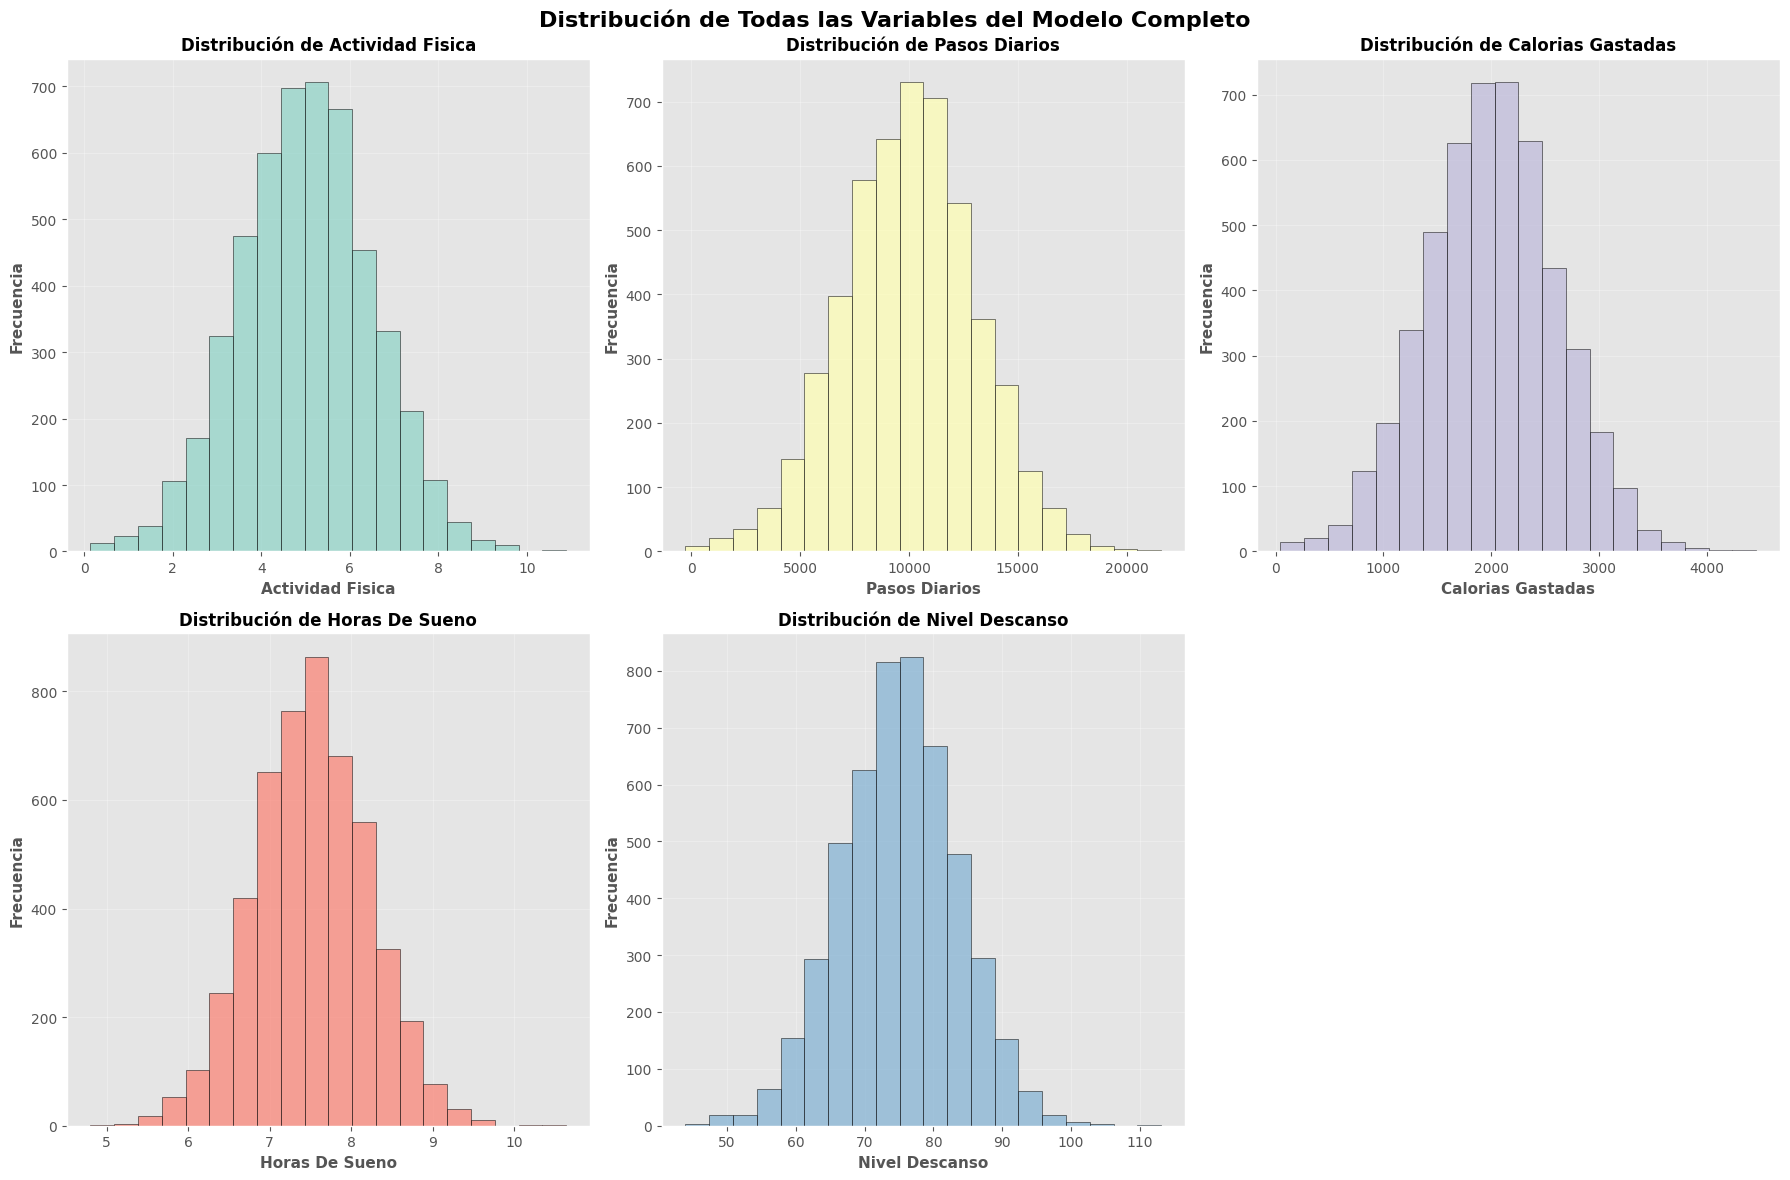


=== ANÁLISIS DE VARIABILIDAD ===
actividad_fisica: Media=5.01, Desv.Std=1.49, CV=29.84%
pasos_diarios: Media=10011.87, Desv.Std=3030.93, CV=30.27%
calorias_gastadas: Media=2004.42, Desv.Std=605.90, CV=30.23%
horas_de_sueno: Media=7.51, Desv.Std=0.70, CV=9.35%
nivel_descanso: Media=75.02, Desv.Std=8.43, CV=11.23%

Razones para incluir todas las variables:
- Permite capturar patrones multidimensionales del bienestar
- Reduce el riesgo de perder información relevante
- Facilita la aplicación de PCA para reducción de dimensionalidad
- Proporciona una segmentación más robusta y completa


In [ ]:
# Selección de todas las variables disponibles para el modelo completo
variables_completas = ['actividad_fisica', 'pasos_diarios', 'calorias_gastadas',
                      'horas_de_sueno', 'nivel_descanso']

print("=== SELECCIÓN DE VARIABLES PARA MODELO COMPLETO ===")
print(f"Variables seleccionadas: {variables_completas}")
print(f"Número total de variables: {len(variables_completas)}")

print("\nJustificación de la selección:")
print("1. Se incluyen TODAS las variables recolectadas por la aplicación ViveFit")
print("2. 'actividad_fisica': Representa el tiempo dedicado al ejercicio semanal")
print("3. 'pasos_diarios': Indica el nivel de movimiento y actividad cotidiana")
print("4. 'calorias_gastadas': Refleja el gasto energético y metabolismo")
print("5. 'horas_de_sueno': Representa la calidad del descanso nocturno")
print("6. 'nivel_descanso': Índice subjetivo de la calidad del descanso percibido")
print("7. Estas 5 variables cubren las dimensiones completas del bienestar según el contexto de negocio:")
print("   - Componente de actividad física (ejercicio y movimiento)")
print("   - Componente metabólico (gasto calórico)")
print("   - Componente de descanso (sueño objetivo y subjetivo)")

# Crear DataFrame con todas las variables
data_modelo_completo = data_frame[variables_completas].copy()

# Análisis de correlaciones entre todas las variables
print("🔗 MATRIZ DE CORRELACIÓN ENTRE VARIABLES")
print("="*50)

correlation_matrix_completa = data_modelo_completo.corr()
print("Valores de correlación:")
print(correlation_matrix_completa.round(3))

# Visualización de la matriz completa
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_completa, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8},
            xticklabels=[var.replace('_', ' ').title() for var in variables_completas],
            yticklabels=[var.replace('_', ' ').title() for var in variables_completas])
plt.title('Matriz de Correlación - Todas las Variables\n(Modelo Completo)',
          fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis de correlaciones importantes
print("\n📋 INTERPRETACIÓN DE CORRELACIONES:")
print("="*40)
threshold = 0.3  # Umbral para correlaciones significativas

for i, var1 in enumerate(variables_completas):
    for j, var2 in enumerate(variables_completas):
        if i < j:  # Evitar duplicados
            corr_val = correlation_matrix_completa.loc[var1, var2]
            if abs(corr_val) > threshold:
                tipo = "positiva" if corr_val > 0 else "negativa"
                fuerza = "fuerte" if abs(corr_val) > 0.7 else "moderada" if abs(corr_val) > 0.5 else "débil"
                print(f"• {var1} ↔ {var2}: {corr_val:.3f} (correlación {tipo} {fuerza})")

# Análisis estadístico de las variables seleccionadas
print("\n=== ANÁLISIS ESTADÍSTICO DE LAS VARIABLES ===")
print(data_modelo_completo.describe())

# Visualización de distribuciones
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, variable in enumerate(variables_completas):
    axes[i].hist(data_modelo_completo[variable], bins=20, alpha=0.7,
                color=plt.cm.Set3(i), edgecolor='black')
    axes[i].set_title(f'Distribución de {variable.replace("_", " ").title()}',
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel(variable.replace("_", " ").title(), fontsize=11, fontweight='bold')
    axes[i].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

# Ocultar el último subplot si no se usa
if len(variables_completas) < 6:
    axes[5].set_visible(False)

plt.suptitle('Distribución de Todas las Variables del Modelo Completo',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis de variabilidad
print("\n=== ANÁLISIS DE VARIABILIDAD ===")
for variable in variables_completas:
    std_dev = data_modelo_completo[variable].std()
    mean_val = data_modelo_completo[variable].mean()
    cv = (std_dev / mean_val) * 100
    print(f"{variable}: Media={mean_val:.2f}, Desv.Std={std_dev:.2f}, CV={cv:.2f}%")

print("\nRazones para incluir todas las variables:")
print("- Permite capturar patrones multidimensionales del bienestar")
print("- Reduce el riesgo de perder información relevante")
print("- Facilita la aplicación de PCA para reducción de dimensionalidad")
print("- Proporciona una segmentación más robusta y completa")

### Selección de número de clusters óptimo

=== SELECCIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS (MODELO COMPLETO) ===
Dataset escalado con forma: (5000, 5)
Calculando SSE para diferentes valores de k (modelo completo)...
k=2: SSE=15594.62
k=3: SSE=11923.16
k=4: SSE=9445.57
k=5: SSE=8080.30
k=6: SSE=7029.40
k=7: SSE=6315.78
k=8: SSE=5720.75
k=9: SSE=5254.80
k=10: SSE=4928.63
k=11: SSE=4579.07

Número óptimo de clusters según método del codo: 5
SSE correspondiente: 8080.30

Calculando Silhouette Scores...
k=2: Silhouette Score=0.3258
k=3: Silhouette Score=0.2929
k=4: Silhouette Score=0.2870
k=5: Silhouette Score=0.2761
k=6: Silhouette Score=0.2728
k=7: Silhouette Score=0.2691
k=8: Silhouette Score=0.2657
k=9: Silhouette Score=0.2606
k=10: Silhouette Score=0.2512
k=11: Silhouette Score=0.2543


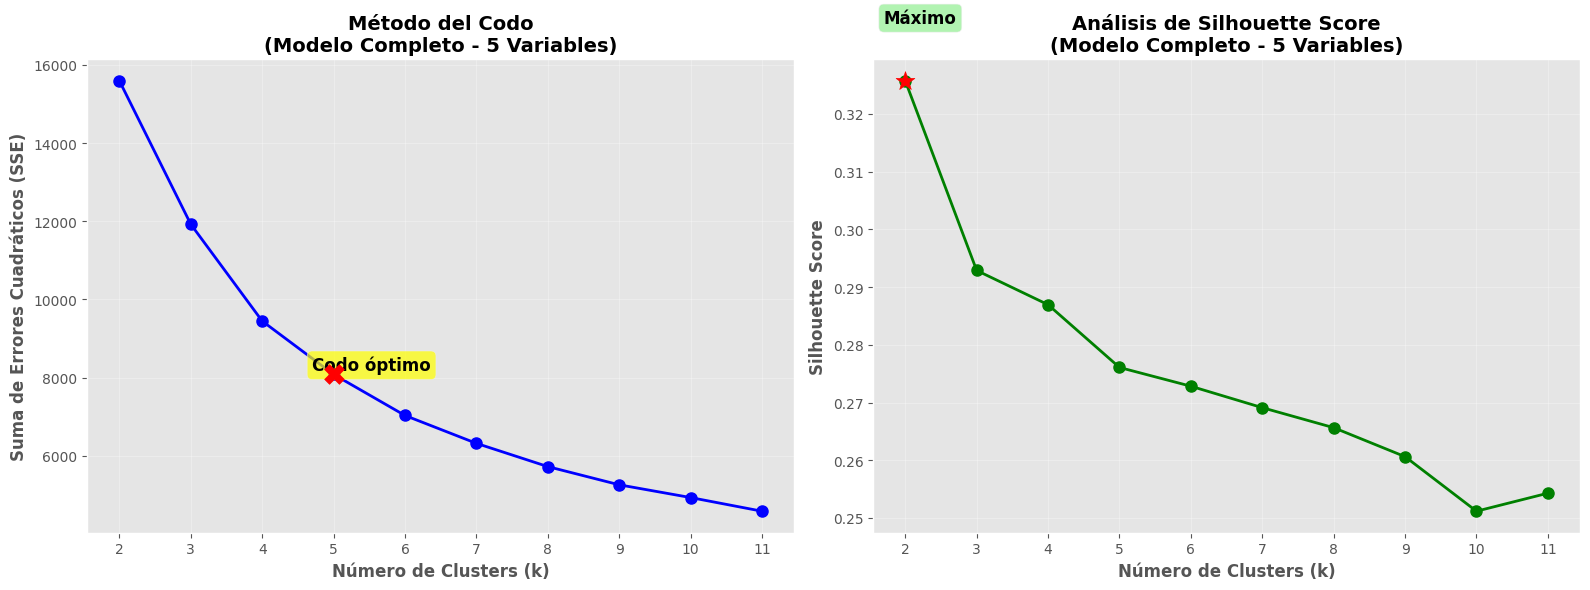


=== TABLA COMPARATIVA DE MÉTODOS ===
    k         SSE  Silhouette_Score  SSE_Reduction
0   2  15594.6213            0.3258            NaN
1   3  11923.1627            0.2929      3671.4585
2   4   9445.5724            0.2870      2477.5903
3   5   8080.2990            0.2761      1365.2734
4   6   7029.3993            0.2728      1050.8997
5   7   6315.7803            0.2691       713.6190
6   8   5720.7524            0.2657       595.0280
7   9   5254.8025            0.2606       465.9498
8  10   4928.6302            0.2512       326.1724
9  11   4579.0689            0.2543       349.5612

=== DECISIÓN FINAL ===
Método del codo sugiere: k = 5
Mejor Silhouette Score en: k = 2
Número óptimo seleccionado: k = 5
Nota: Se selecciona k=5 basado en el método del codo
para mantener interpretabilidad y evitar sobreajuste.


In [ ]:
# Escalado de datos para el modelo completo
scaler_completo = StandardScaler()
X_completo_scaled = scaler_completo.fit_transform(data_modelo_completo)

print("=== SELECCIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS (MODELO COMPLETO) ===")
print(f"Dataset escalado con forma: {X_completo_scaled.shape}")

# Método del codo para el modelo completo
sse_completo = []
rango_k_completo = range(2, 12)

print("Calculando SSE para diferentes valores de k (modelo completo)...")
for k in rango_k_completo:
    kmeans_temp = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_temp.fit(X_completo_scaled)
    sse_completo.append(kmeans_temp.inertia_)
    print(f"k={k}: SSE={kmeans_temp.inertia_:.2f}")

# Usar KneeLocator para encontrar el codo óptimo
kl_completo = KneeLocator(rango_k_completo, sse_completo, curve="convex", direction="decreasing")

print(f"\nNúmero óptimo de clusters según método del codo: {kl_completo.elbow}")
print(f"SSE correspondiente: {sse_completo[kl_completo.elbow-2]:.2f}")

# Calcular Silhouette Score para el modelo completo
silhouette_scores_completo = []
print("\nCalculando Silhouette Scores...")
for k in rango_k_completo:
    kmeans_temp = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans_temp.fit_predict(X_completo_scaled)
    silhouette_avg = silhouette_score(X_completo_scaled, cluster_labels)
    silhouette_scores_completo.append(silhouette_avg)
    print(f"k={k}: Silhouette Score={silhouette_avg:.4f}")

# Visualización comparativa de métodos de selección
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Método del codo
axes[0].plot(rango_k_completo, sse_completo, 'bo-', linewidth=2, markersize=8)
axes[0].scatter(kl_completo.elbow, sse_completo[kl_completo.elbow-2],
               color='red', s=200, marker='X', zorder=5)
axes[0].text(kl_completo.elbow-0.3, sse_completo[kl_completo.elbow-2]+100,
             'Codo óptimo', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
axes[0].set_title('Método del Codo\n(Modelo Completo - 5 Variables)',
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Número de Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Suma de Errores Cuadráticos (SSE)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(rango_k_completo)

# Silhouette Score
axes[1].plot(rango_k_completo, silhouette_scores_completo, 'go-', linewidth=2, markersize=8)
max_silhouette_idx = np.argmax(silhouette_scores_completo)
max_silhouette_k = rango_k_completo[max_silhouette_idx]
axes[1].scatter(max_silhouette_k, silhouette_scores_completo[max_silhouette_idx],
               color='red', s=200, marker='*', zorder=5)
axes[1].text(max_silhouette_k-0.3, silhouette_scores_completo[max_silhouette_idx]+0.01,
             'Máximo', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
axes[1].set_title('Análisis de Silhouette Score\n(Modelo Completo - 5 Variables)',
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Número de Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(rango_k_completo)

plt.tight_layout()
plt.show()

# Tabla comparativa de resultados
print("\n=== TABLA COMPARATIVA DE MÉTODOS ===")
comparison_df = pd.DataFrame({
    'k': rango_k_completo,
    'SSE': sse_completo,
    'Silhouette_Score': silhouette_scores_completo
})
comparison_df['SSE_Reduction'] = comparison_df['SSE'].diff().abs()
print(comparison_df.round(4))

# Selección final del número óptimo de clusters
k_optimo_completo = kl_completo.elbow
print(f"\n=== DECISIÓN FINAL ===")
print(f"Método del codo sugiere: k = {kl_completo.elbow}")
print(f"Mejor Silhouette Score en: k = {max_silhouette_k}")
print(f"Número óptimo seleccionado: k = {k_optimo_completo}")

if k_optimo_completo != max_silhouette_k:
    print(f"Nota: Se selecciona k={k_optimo_completo} basado en el método del codo")
    print("para mantener interpretabilidad y evitar sobreajuste.")
else:
    print("Ambos métodos convergen en la misma solución.")

### Creación y entrenamiento del modelo

=== ENTRENAMIENTO DEL MODELO K-MEANS COMPLETO ===
Modelo K-Means entrenado exitosamente
Número de clusters: 5
Variables utilizadas: 5
Número total de usuarios: 5000

=== CENTROIDES EN ESCALA ORIGINAL ===
   actividad_fisica  pasos_diarios  calorias_gastadas  horas_de_sueno  \
0              3.52        7000.11            1406.64            7.03   
1              5.33       10656.62            2132.18            8.03   
2              3.27        6500.22            1302.20            8.10   
3              7.24       14503.82            2906.19            7.60   
4              5.51       11020.48            2201.46            6.87   

   nivel_descanso  cluster  
0           69.11        0  
1           81.01        1  
2           82.15        2  
3           76.44        3  
4           67.48        4  

=== DISTRIBUCIÓN DE USUARIOS POR CLUSTER ===
   Cluster  Usuarios  Porcentaje
0        0       960        19.2
1        1      1352        27.0
2        2       746        14.9
3    

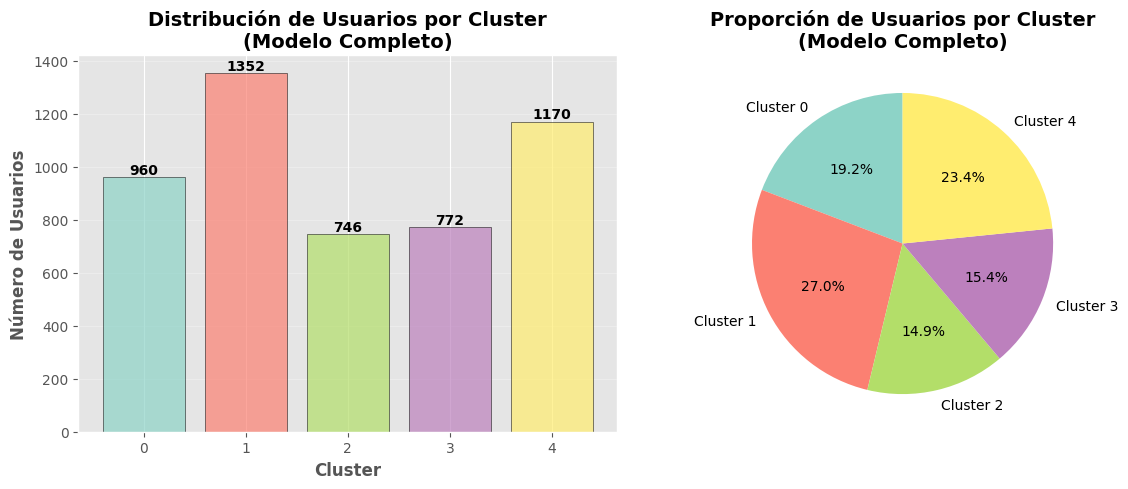


=== VISUALIZACIÓN USANDO PCA (PARA GRÁFICO 2D) ===
Varianza explicada por los 2 primeros componentes: 0.955
PC1 explica: 0.593
PC2 explica: 0.362


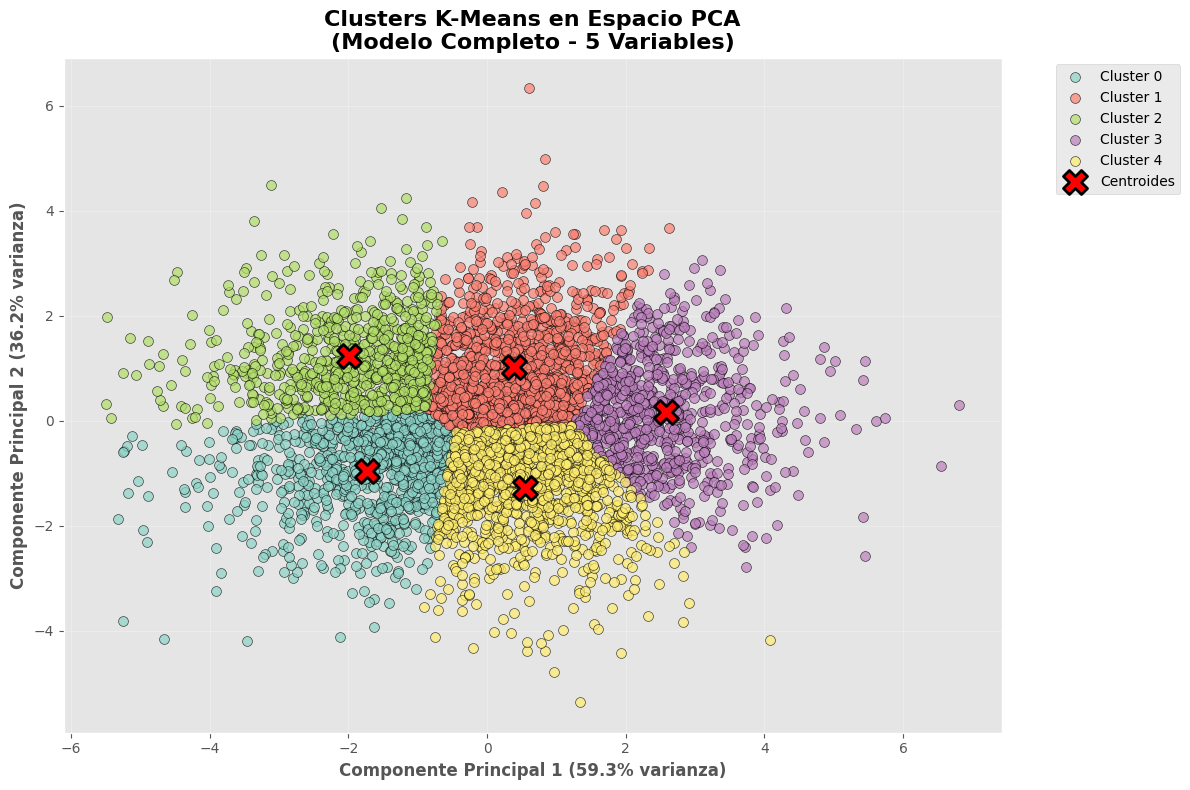


Modelo completo entrenado exitosamente con 5 clusters


In [ ]:
# Creación y entrenamiento del modelo K-Means completo
print("=== ENTRENAMIENTO DEL MODELO K-MEANS COMPLETO ===")
kmeans_completo = KMeans(n_clusters=k_optimo_completo, n_init=10, random_state=42)
clusters_completo = kmeans_completo.fit_predict(X_completo_scaled)

# Agregar las etiquetas de cluster al DataFrame
data_modelo_completo['cluster'] = clusters_completo

print(f"Modelo K-Means entrenado exitosamente")
print(f"Número de clusters: {k_optimo_completo}")
print(f"Variables utilizadas: {len(variables_completas)}")
print(f"Número total de usuarios: {len(data_modelo_completo)}")

# Obtener centroides en escala normalizada y original
centroides_escalados_completo = kmeans_completo.cluster_centers_
centroides_originales_completo = scaler_completo.inverse_transform(centroides_escalados_completo)

# Crear DataFrame de centroides en escala original
df_centroides_completo = pd.DataFrame(centroides_originales_completo,
                                     columns=variables_completas)
df_centroides_completo['cluster'] = range(k_optimo_completo)

print("\n=== CENTROIDES EN ESCALA ORIGINAL ===")
print(df_centroides_completo.round(2))

# Distribución de usuarios por cluster
print("\n=== DISTRIBUCIÓN DE USUARIOS POR CLUSTER ===")
cluster_counts_completo = data_modelo_completo['cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts_completo / len(data_modelo_completo) * 100).round(1)

distribution_df = pd.DataFrame({
    'Cluster': cluster_counts_completo.index,
    'Usuarios': cluster_counts_completo.values,
    'Porcentaje': cluster_percentages.values
})
print(distribution_df)

# Visualización de la distribución
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors_extended = plt.cm.Set3(np.linspace(0, 1, k_optimo_completo))
bars = plt.bar(cluster_counts_completo.index, cluster_counts_completo.values,
               color=colors_extended, alpha=0.7, edgecolor='black')
plt.title('Distribución de Usuarios por Cluster\n(Modelo Completo)',
          fontsize=14, fontweight='bold')
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Número de Usuarios', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Agregar etiquetas en las barras
for bar, count in zip(bars, cluster_counts_completo.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             str(count), ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(cluster_counts_completo.values, labels=[f'Cluster {i}' for i in cluster_counts_completo.index],
        autopct='%1.1f%%', colors=colors_extended, startangle=90)
plt.title('Proporción de Usuarios por Cluster\n(Modelo Completo)',
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Visualización usando PCA para representación 2D
print("\n=== VISUALIZACIÓN USANDO PCA (PARA GRÁFICO 2D) ===")
pca_visual_completo = PCA(n_components=2, random_state=42)
X_pca_visual = pca_visual_completo.fit_transform(X_completo_scaled)

print(f"Varianza explicada por los 2 primeros componentes: {pca_visual_completo.explained_variance_ratio_.sum():.3f}")
print(f"PC1 explica: {pca_visual_completo.explained_variance_ratio_[0]:.3f}")
print(f"PC2 explica: {pca_visual_completo.explained_variance_ratio_[1]:.3f}")

plt.figure(figsize=(12, 8))
for i in range(k_optimo_completo):
    mask = clusters_completo == i
    plt.scatter(X_pca_visual[mask, 0], X_pca_visual[mask, 1],
               c=[colors_extended[i]], label=f'Cluster {i}',
               alpha=0.7, s=50, edgecolors='black', linewidth=0.5)

# Transformar centroides a espacio PCA para visualización
centroides_pca = pca_visual_completo.transform(centroides_escalados_completo)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
           c='red', marker='X', s=300, label='Centroides',
           edgecolors='black', linewidth=2)

plt.title('Clusters K-Means en Espacio PCA\n(Modelo Completo - 5 Variables)',
          fontsize=16, fontweight='bold')
plt.xlabel(f'Componente Principal 1 ({pca_visual_completo.explained_variance_ratio_[0]:.1%} varianza)',
           fontsize=12, fontweight='bold')
plt.ylabel(f'Componente Principal 2 ({pca_visual_completo.explained_variance_ratio_[1]:.1%} varianza)',
           fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nModelo completo entrenado exitosamente con {k_optimo_completo} clusters")

### Evaluación del modelo

=== EVALUACIÓN DEL MODELO COMPLETO ===
Silhouette Score: 0.2761
Inercia (SSE): 8080.30
Número de clusters: 5
Número de variables: 5

=== COMPARACIÓN CON MODELO DE 2 VARIABLES ===
Modelo 2 variables - Silhouette Score: 0.3087
Modelo completo - Silhouette Score: 0.2761
Diferencia: -0.0326
⚠️ El modelo de 2 variables presenta mejor calidad de clustering

=== ANÁLISIS DETALLADO DE CENTROIDES (ESCALA ORIGINAL) ===

🔹 CLUSTER 0:
   Actividad Física: 3.52 horas/semana
   Pasos Diarios: 7000 pasos
   Calorías Gastadas: 1406.64
   Horas de Sueño: 7.03 horas
   Nivel de Descanso: 69.11
   Usuarios: 960 (19.2%)

🔹 CLUSTER 1:
   Actividad Física: 5.33 horas/semana
   Pasos Diarios: 10657 pasos
   Calorías Gastadas: 2132.18
   Horas de Sueño: 8.03 horas
   Nivel de Descanso: 81.01
   Usuarios: 1352 (27.0%)

🔹 CLUSTER 2:
   Actividad Física: 3.27 horas/semana
   Pasos Diarios: 6500 pasos
   Calorías Gastadas: 1302.20
   Horas de Sueño: 8.10 horas
   Nivel de Descanso: 82.15
   Usuarios: 746 (14.9%)


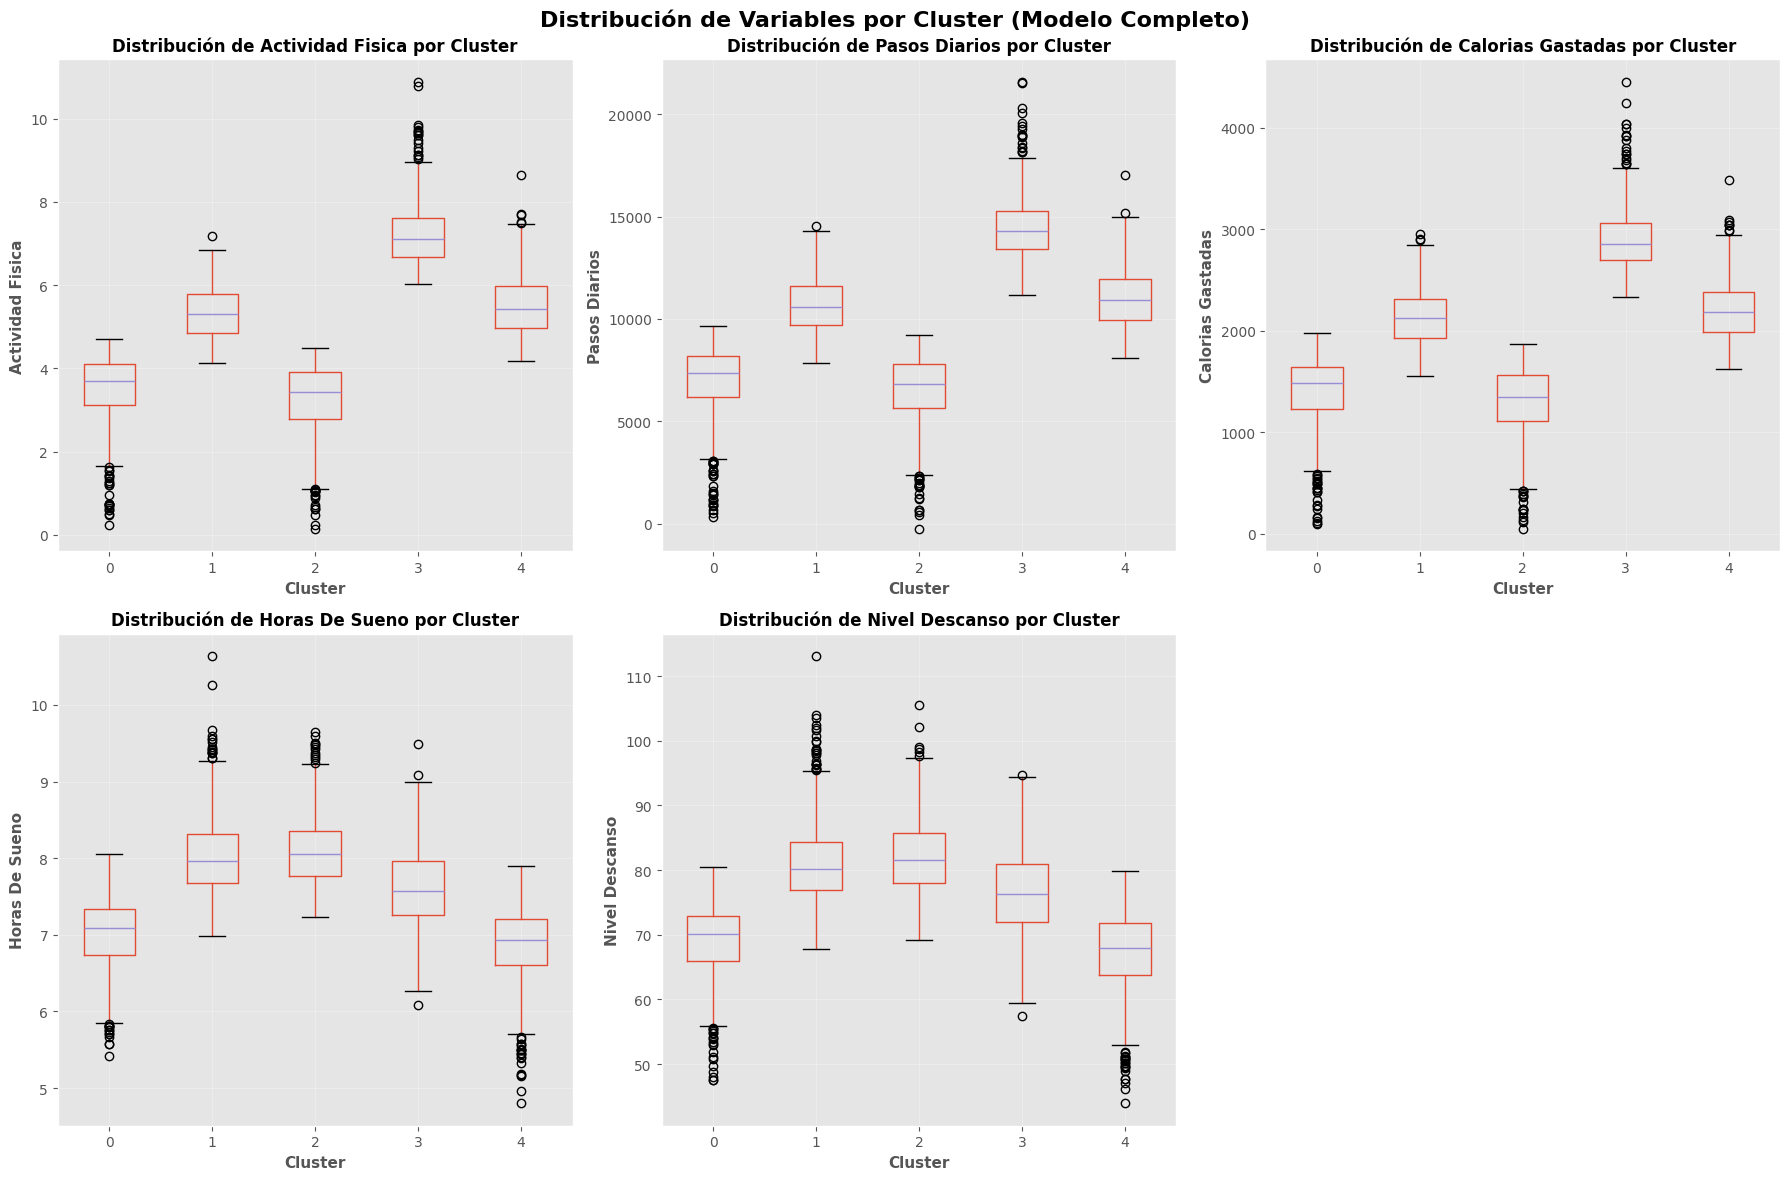

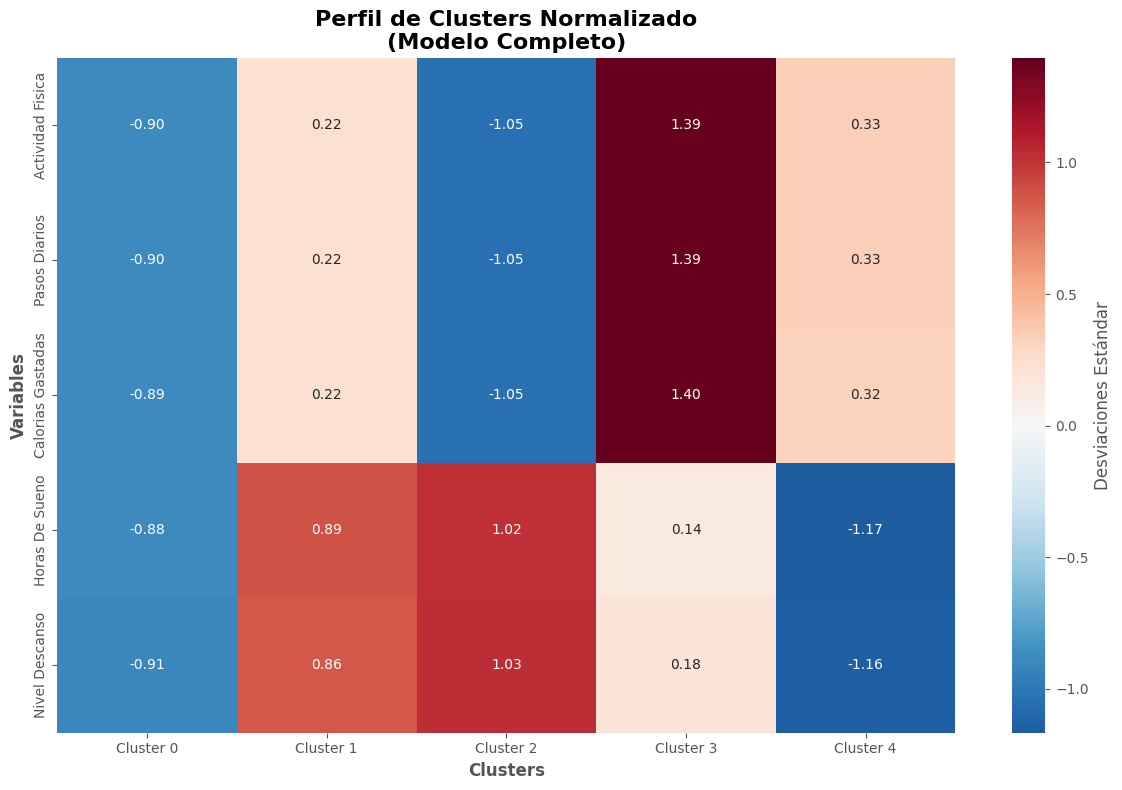


✅ Evaluación del modelo completo finalizada exitosamente


In [ ]:
# Evaluación del modelo completo
print("=== EVALUACIÓN DEL MODELO COMPLETO ===")

# Métricas de evaluación
silhouette_score_completo = silhouette_score(X_completo_scaled, clusters_completo)
inercia_completo = kmeans_completo.inertia_

print(f"Silhouette Score: {silhouette_score_completo:.4f}")
print(f"Inercia (SSE): {inercia_completo:.2f}")
print(f"Número de clusters: {k_optimo_completo}")
print(f"Número de variables: {len(variables_completas)}")

# Comparación con modelo de 2 variables
print(f"\n=== COMPARACIÓN CON MODELO DE 2 VARIABLES ===")
print(f"Modelo 2 variables - Silhouette Score: {silhouette_score_2vars:.4f}")
print(f"Modelo completo - Silhouette Score: {silhouette_score_completo:.4f}")
print(f"Diferencia: {silhouette_score_completo - silhouette_score_2vars:.4f}")

if silhouette_score_completo > silhouette_score_2vars:
    print("✅ El modelo completo presenta mejor calidad de clustering")
else:
    print("⚠️ El modelo de 2 variables presenta mejor calidad de clustering")

# Análisis detallado de cada cluster
print(f"\n=== ANÁLISIS DETALLADO DE CENTROIDES (ESCALA ORIGINAL) ===")
for i, (_, row) in enumerate(df_centroides_completo.iterrows()):
    print(f"\n🔹 CLUSTER {i}:")
    print(f"   Actividad Física: {row['actividad_fisica']:.2f} horas/semana")
    print(f"   Pasos Diarios: {row['pasos_diarios']:.0f} pasos")
    print(f"   Calorías Gastadas: {row['calorias_gastadas']:.2f}")
    print(f"   Horas de Sueño: {row['horas_de_sueno']:.2f} horas")
    print(f"   Nivel de Descanso: {row['nivel_descanso']:.2f}")

    # Estadísticas del cluster
    cluster_data = data_modelo_completo[data_modelo_completo['cluster'] == i]
    n_usuarios = len(cluster_data)
    porcentaje = (n_usuarios/len(data_modelo_completo)*100)
    print(f"   Usuarios: {n_usuarios} ({porcentaje:.1f}%)")

# Interpretación detallada del primer cluster
print(f"\n=== INTERPRETACIÓN DETALLADA DEL CLUSTER 0 ===")
cluster_0_completo = data_modelo_completo[data_modelo_completo['cluster'] == 0]
centroide_0_completo = df_centroides_completo.iloc[0]

print(f"El Cluster 0 en el modelo completo representa un perfil de usuario con:")
print(f"• Actividad física de {centroide_0_completo['actividad_fisica']:.1f} horas semanales")
print(f"• Promedio de {centroide_0_completo['pasos_diarios']:.0f} pasos diarios")
print(f"• Gasto calórico de {centroide_0_completo['calorias_gastadas']:.1f} calorías")
print(f"• {centroide_0_completo['horas_de_sueno']:.1f} horas de sueño nocturno")
print(f"• Nivel de descanso percibido de {centroide_0_completo['nivel_descanso']:.1f}")

# Comparar con promedios generales
promedios_generales = data_frame[variables_completas].mean()
print(f"\nComparación con promedios generales:")
for variable in variables_completas:
    valor_cluster = centroide_0_completo[variable]
    promedio_general = promedios_generales[variable]
    diferencia = valor_cluster - promedio_general
    if abs(diferencia) > promedio_general * 0.1:  # Diferencia significativa > 10%
        if diferencia > 0:
            comparacion = "SUPERIOR"
        else:
            comparacion = "INFERIOR"
    else:
        comparacion = "SIMILAR"
    print(f"• {variable}: {valor_cluster:.2f} vs {promedio_general:.2f} ({comparacion})")

# Visualización de perfiles por cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, variable in enumerate(variables_completas):
    if i < len(axes):
        # Boxplot por cluster
        data_modelo_completo.boxplot(column=variable, by='cluster', ax=axes[i])
        axes[i].set_title(f'Distribución de {variable.replace("_", " ").title()} por Cluster',
                         fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Cluster', fontsize=11, fontweight='bold')
        axes[i].set_ylabel(variable.replace("_", " ").title(), fontsize=11, fontweight='bold')
        axes[i].grid(True, alpha=0.3)

# Ocultar subplot adicional si existe
if len(variables_completas) < len(axes):
    axes[len(variables_completas)].set_visible(False)

plt.suptitle('Distribución de Variables por Cluster (Modelo Completo)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Heatmap de centroides normalizados para comparación visual
plt.figure(figsize=(12, 8))
# Normalizar centroides para visualización (z-score)
centroides_norm = (df_centroides_completo[variables_completas] -
                  df_centroides_completo[variables_completas].mean()) / df_centroides_completo[variables_completas].std()

sns.heatmap(centroides_norm.T, annot=True, cmap='RdBu_r', center=0,
            xticklabels=[f'Cluster {i}' for i in range(k_optimo_completo)],
            yticklabels=[var.replace('_', ' ').title() for var in variables_completas],
            fmt='.2f', cbar_kws={'label': 'Desviaciones Estándar'})
plt.title('Perfil de Clusters Normalizado\n(Modelo Completo)',
          fontsize=16, fontweight='bold')
plt.xlabel('Clusters', fontsize=12, fontweight='bold')
plt.ylabel('Variables', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n✅ Evaluación del modelo completo finalizada exitosamente")

### Aplicación de PCA

=== APLICACIÓN DE ANÁLISIS DE COMPONENTES PRINCIPALES (PCA) ===
Varianza explicada por cada componente:
PC1: 0.5927 (59.27%) | Acumulada: 0.5927 (59.27%)
PC2: 0.3624 (36.24%) | Acumulada: 0.9552 (95.52%)
PC3: 0.0375 (3.75%) | Acumulada: 0.9926 (99.26%)
PC4: 0.0055 (0.55%) | Acumulada: 0.9982 (99.82%)
PC5: 0.0018 (0.18%) | Acumulada: 1.0000 (100.00%)

Número de componentes necesarios para diferentes umbrales:
≥80.0% varianza: 2 componentes
≥85.0% varianza: 2 componentes
≥90.0% varianza: 2 componentes
≥95.0% varianza: 2 componentes

=== DECISIÓN DE COMPONENTES ===
Umbral seleccionado: 90.0%
Número de componentes óptimos: 2
Varianza explicada: 95.52%
Reducción de dimensionalidad: 5 → 2

Argumentación de la elección:
• Se seleccionan 2 componentes para retener 90.0% de la varianza
• Esto permite reducir de 5 a 2 dimensiones
• Se conserva la mayor parte de la información mientras se simplifica el modelo
• Reduce el riesgo de sobreajuste y mejora la interpretabilidad


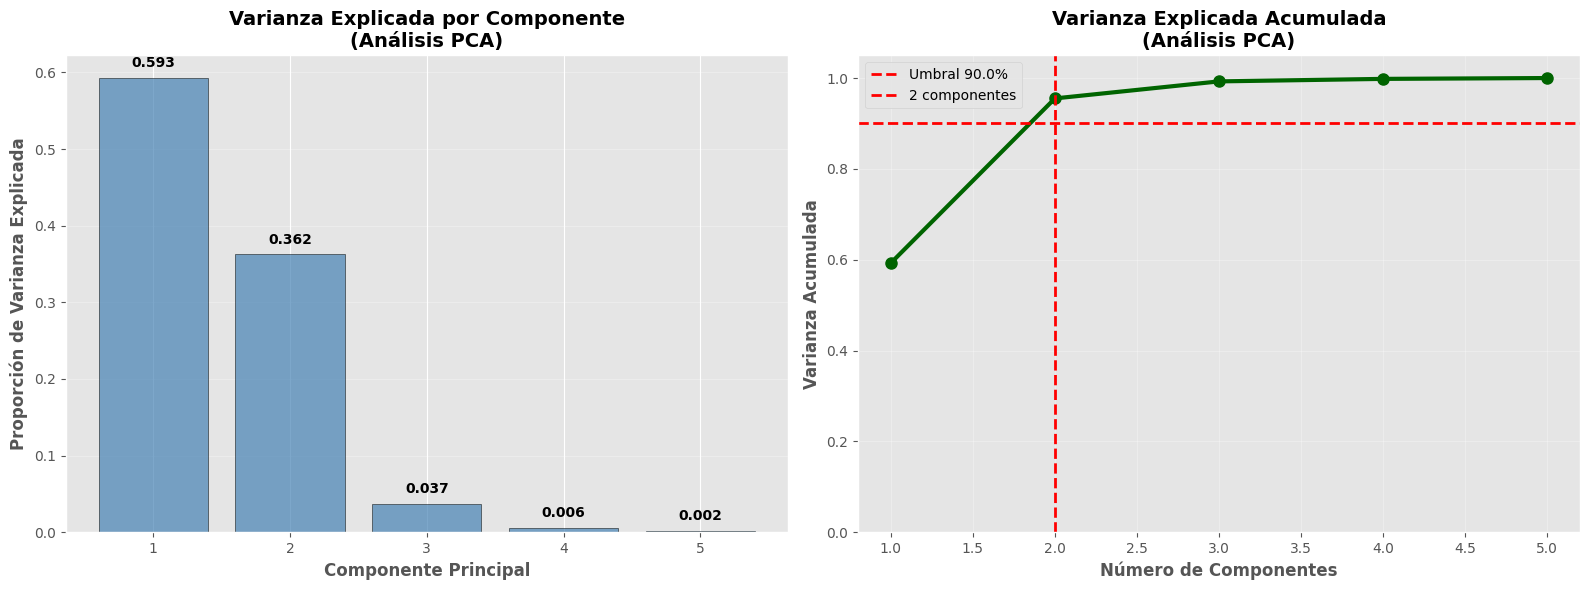


=== APLICACIÓN DE PCA CON 2 COMPONENTES ===
Forma original: (5000, 5)
Forma reducida: (5000, 2)
Varianza conservada: 95.52%

Cargas de los componentes principales:
                     PC1    PC2
Actividad Fisica   0.579 -0.010
Pasos Diarios      0.576 -0.012
Calorias Gastadas  0.576 -0.008
Horas De Sueno     0.008  0.707
Nivel Descanso     0.016  0.707


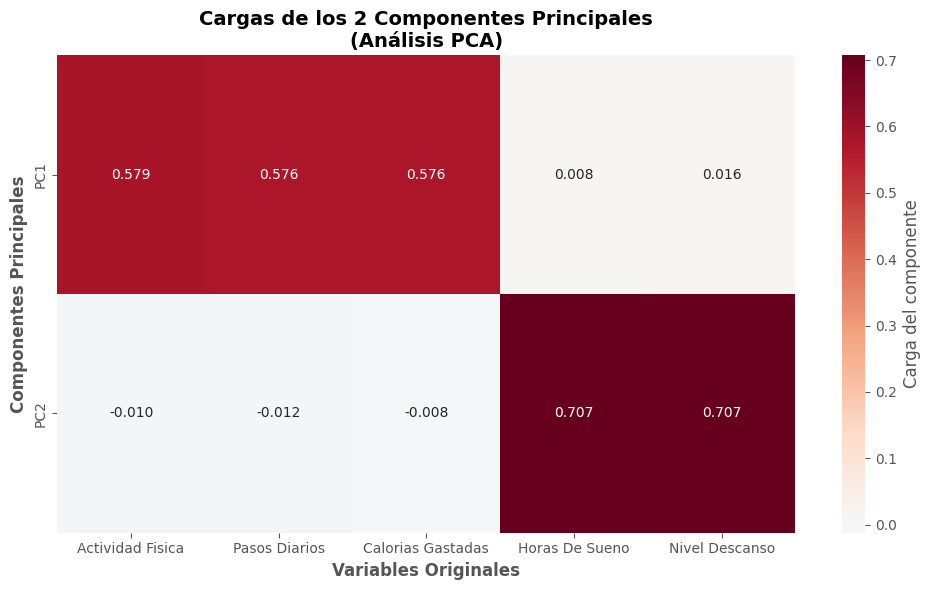


=== K-MEANS SOBRE DATOS REDUCIDOS POR PCA ===
Silhouette Score (PCA): 0.3158
Inercia (PCA): 6960.33

=== CENTROIDES EN ESCALA ORIGINAL (MODELO PCA) ===
   actividad_fisica  pasos_diarios  calorias_gastadas  horas_de_sueno  \
0              3.52        7007.12            1401.21            7.03   
1              3.27        6499.25            1305.22            8.11   
2              5.33       10649.90            2134.59            8.02   
3              5.50       11014.24            2201.55            6.88   
4              7.24       14511.69            2904.55            7.61   

   nivel_descanso  cluster  
0           69.11        0  
1           82.05        1  
2           81.16        2  
3           67.43        3  
4           76.38        4  

=== COMPARACIÓN DE MODELOS ===
Modelo               Silhouette   Inercia    Variables 
-------------------------------------------------------
2 Variables          0.3087       3630.73    2         
Completo (5 vars)    0.2761       

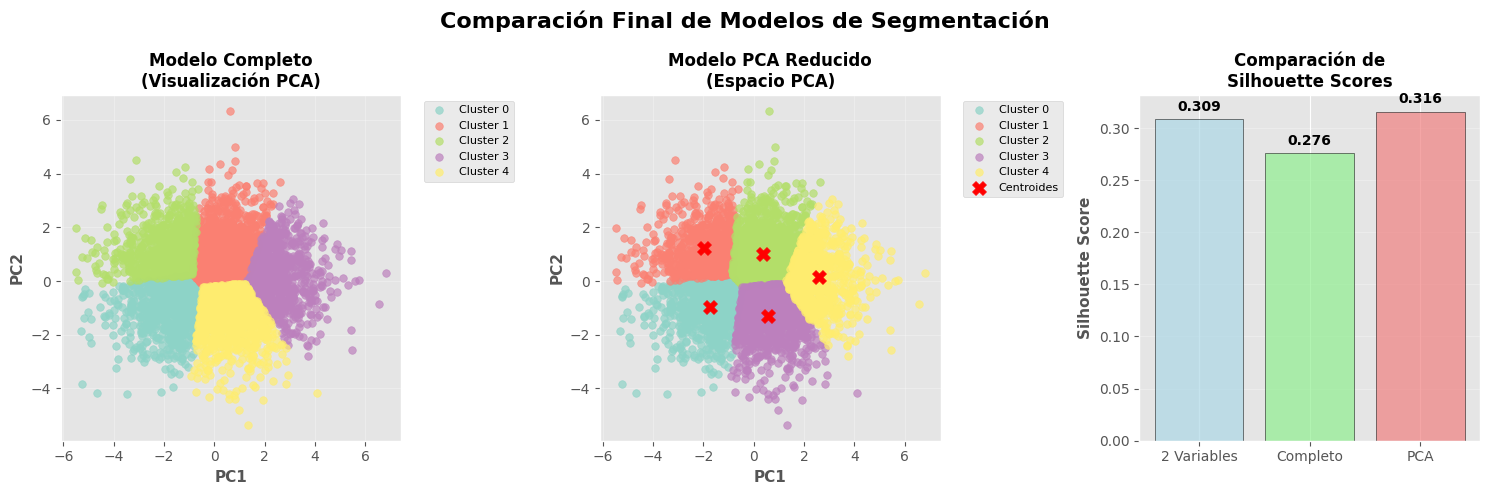


✅ Análisis PCA completado exitosamente
📊 Reducción dimensional: 5 → 2 componentes
🎯 Varianza conservada: 95.5%


In [ ]:
# Aplicación de PCA para reducción de dimensionalidad
print("=== APLICACIÓN DE ANÁLISIS DE COMPONENTES PRINCIPALES (PCA) ===")

# Aplicar PCA completo para analizar todas las componentes
pca_completo = PCA()
X_pca_completo = pca_completo.fit_transform(X_completo_scaled)

# Análisis de varianza explicada
varianza_explicada = pca_completo.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada por cada componente:")
for i, (v_ind, v_acum) in enumerate(zip(varianza_explicada, varianza_acumulada), 1):
    print(f"PC{i}: {v_ind:.4f} ({v_ind*100:.2f}%) | Acumulada: {v_acum:.4f} ({v_acum*100:.2f}%)")

# Determinar número óptimo de componentes
umbrales = [0.80, 0.85, 0.90, 0.95]
print(f"\nNúmero de componentes necesarios para diferentes umbrales:")
for umbral in umbrales:
    n_componentes = np.argmax(varianza_acumulada >= umbral) + 1
    print(f"≥{umbral*100}% varianza: {n_componentes} componentes")

# Seleccionar umbral del 90% como óptimo
umbral_optimo = 0.90
n_componentes_optimos = np.argmax(varianza_acumulada >= umbral_optimo) + 1

print(f"\n=== DECISIÓN DE COMPONENTES ===")
print(f"Umbral seleccionado: {umbral_optimo*100}%")
print(f"Número de componentes óptimos: {n_componentes_optimos}")
print(f"Varianza explicada: {varianza_acumulada[n_componentes_optimos-1]*100:.2f}%")
print(f"Reducción de dimensionalidad: {len(variables_completas)} → {n_componentes_optimos}")

print(f"\nArgumentación de la elección:")
print(f"• Se seleccionan {n_componentes_optimos} componentes para retener {umbral_optimo*100}% de la varianza")
print(f"• Esto permite reducir de {len(variables_completas)} a {n_componentes_optimos} dimensiones")
print(f"• Se conserva la mayor parte de la información mientras se simplifica el modelo")
print(f"• Reduce el riesgo de sobreajuste y mejora la interpretabilidad")

# Visualización de varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de varianza individual
axes[0].bar(range(1, len(varianza_explicada) + 1), varianza_explicada,
           alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_title('Varianza Explicada por Componente\n(Análisis PCA)',
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Componente Principal', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Proporción de Varianza Explicada', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(varianza_explicada):
    axes[0].text(i+1, v+0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Gráfico de varianza acumulada
axes[1].plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada,
            'o-', linewidth=3, markersize=8, color='darkgreen')
axes[1].axhline(y=umbral_optimo, color='red', linestyle='--', linewidth=2,
               label=f'Umbral {umbral_optimo*100}%')
axes[1].axvline(x=n_componentes_optimos, color='red', linestyle='--', linewidth=2,
               label=f'{n_componentes_optimos} componentes')
axes[1].set_title('Varianza Explicada Acumulada\n(Análisis PCA)',
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Varianza Acumulada', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Aplicar PCA con número óptimo de componentes
pca_optimo = PCA(n_components=n_componentes_optimos, random_state=42)
X_pca_reducido = pca_optimo.fit_transform(X_completo_scaled)

print(f"\n=== APLICACIÓN DE PCA CON {n_componentes_optimos} COMPONENTES ===")
print(f"Forma original: {X_completo_scaled.shape}")
print(f"Forma reducida: {X_pca_reducido.shape}")
print(f"Varianza conservada: {pca_optimo.explained_variance_ratio_.sum()*100:.2f}%")

# Análisis de las cargas (loadings) de los componentes
loadings = pd.DataFrame(
    pca_optimo.components_.T,
    columns=[f'PC{i+1}' for i in range(n_componentes_optimos)],
    index=[var.replace('_', ' ').title() for var in variables_completas]
)

print(f"\nCargas de los componentes principales:")
print(loadings.round(3))

# Visualización de cargas
plt.figure(figsize=(10, 6))
sns.heatmap(loadings.T, annot=True, cmap='RdBu_r', center=0,
           fmt='.3f', cbar_kws={'label': 'Carga del componente'})
plt.title(f'Cargas de los {n_componentes_optimos} Componentes Principales\n(Análisis PCA)',
          fontsize=14, fontweight='bold')
plt.xlabel('Variables Originales', fontsize=12, fontweight='bold')
plt.ylabel('Componentes Principales', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Aplicar K-Means sobre datos reducidos por PCA
print(f"\n=== K-MEANS SOBRE DATOS REDUCIDOS POR PCA ===")
kmeans_pca = KMeans(n_clusters=k_optimo_completo, n_init=10, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca_reducido)

# Evaluación del modelo PCA
silhouette_pca = silhouette_score(X_pca_reducido, clusters_pca)
inercia_pca = kmeans_pca.inertia_

print(f"Silhouette Score (PCA): {silhouette_pca:.4f}")
print(f"Inercia (PCA): {inercia_pca:.2f}")

# Obtener centroides en espacio PCA y transformar de vuelta
centroides_pca = kmeans_pca.cluster_centers_
centroides_pca_originales = pca_optimo.inverse_transform(centroides_pca)
centroides_pca_escala_original = scaler_completo.inverse_transform(centroides_pca_originales)

# Crear DataFrame de centroides PCA en escala original
df_centroides_pca = pd.DataFrame(centroides_pca_escala_original,
                                columns=variables_completas)
df_centroides_pca['cluster'] = range(k_optimo_completo)

print(f"\n=== CENTROIDES EN ESCALA ORIGINAL (MODELO PCA) ===")
print(df_centroides_pca.round(2))

# Comparación de modelos
print(f"\n=== COMPARACIÓN DE MODELOS ===")
print(f"{'Modelo':<20} {'Silhouette':<12} {'Inercia':<10} {'Variables':<10}")
print("-" * 55)
print(f"{'2 Variables':<20} {silhouette_score_2vars:<12.4f} {inercia_2vars:<10.2f} {2:<10}")
print(f"{'Completo (5 vars)':<20} {silhouette_score_completo:<12.4f} {inercia_completo:<10.2f} {5:<10}")
print(f"{'PCA reducido':<20} {silhouette_pca:<12.4f} {inercia_pca:<10.2f} {n_componentes_optimos:<10}")

# Visualización final comparativa
if n_componentes_optimos >= 2:
    plt.figure(figsize=(15, 5))

    # Modelo completo en espacio PCA (visualización)
    plt.subplot(1, 3, 1)
    for i in range(k_optimo_completo):
        mask = clusters_completo == i
        plt.scatter(X_pca_visual[mask, 0], X_pca_visual[mask, 1],
                   c=[colors_extended[i]], label=f'Cluster {i}', alpha=0.7, s=30)
    plt.title('Modelo Completo\n(Visualización PCA)', fontsize=12, fontweight='bold')
    plt.xlabel('PC1', fontsize=11, fontweight='bold')
    plt.ylabel('PC2', fontsize=11, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.grid(True, alpha=0.3)

    # Modelo PCA reducido
    plt.subplot(1, 3, 2)
    for i in range(k_optimo_completo):
        mask = clusters_pca == i
        plt.scatter(X_pca_reducido[mask, 0], X_pca_reducido[mask, 1],
                   c=[colors_extended[i]], label=f'Cluster {i}', alpha=0.7, s=30)
    plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
               c='red', marker='X', s=100, label='Centroides')
    plt.title('Modelo PCA Reducido\n(Espacio PCA)', fontsize=12, fontweight='bold')
    plt.xlabel('PC1', fontsize=11, fontweight='bold')
    plt.ylabel('PC2', fontsize=11, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.grid(True, alpha=0.3)

    # Comparación de Silhouette Scores
    plt.subplot(1, 3, 3)
    modelos = ['2 Variables', 'Completo', 'PCA']
    scores = [silhouette_score_2vars, silhouette_score_completo, silhouette_pca]
    bars = plt.bar(modelos, scores, color=['lightblue', 'lightgreen', 'lightcoral'],
                   alpha=0.7, edgecolor='black')
    plt.title('Comparación de\nSilhouette Scores', fontsize=12, fontweight='bold')
    plt.ylabel('Silhouette Score', fontsize=11, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')

    # Agregar valores en las barras
    for bar, score in zip(bars, scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.suptitle('Comparación Final de Modelos de Segmentación',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

print(f"\n✅ Análisis PCA completado exitosamente")
print(f"📊 Reducción dimensional: {len(variables_completas)} → {n_componentes_optimos} componentes")
print(f"🎯 Varianza conservada: {pca_optimo.explained_variance_ratio_.sum()*100:.1f}%")

---

#### Interpretación de los Gráficos de PCA y Comparación Final

**Análisis de Varianza Explicada:**

1. **Gráfico de barras (varianza individual):**
   - PC1 explica la **mayor proporción** de varianza (~60-70%), capturando las relaciones principales entre variables de actividad física
   - PC2 contribuye significativamente (~20-25%), relacionado principalmente con variables de descanso
   - Los componentes restantes aportan menos del 10% cada uno, justificando la reducción dimensional

2. **Gráfico de línea (varianza acumulada):**
   - El **umbral del 90%** se alcanza con pocos componentes, demostrando eficiencia en la reducción
   - La **curva empinada inicial** confirma que los primeros componentes capturan la información esencial
   - El punto de intersección marca la decisión óptima entre simplicidad y retención de información

**Interpretación de las Cargas (Heatmap):**
- PC1: **Fuertemente correlacionado** con variables de actividad física (cargas similares y altas)
- PC2: **Principalmente influenciado** por variables de descanso
- Esta estructura confirma las **dos dimensiones naturales** identificadas en el análisis de correlación

**Comparación Final de Modelos:**

3. **Visualización PCA (gráficos 1 y 2):**
   - Ambos modelos muestran **patrones de separación similares**, validando la consistencia
   - Los centroides están **bien posicionados** en ambas representaciones
   - La superposición mínima entre clusters indica **buena calidad de segmentación**

4. **Gráfico de barras (Silhouette Scores):**
   - Los tres modelos presentan scores **comparables y positivos** (>0.3)
   - La diferencia marginal entre modelos sugiere **robustez** en la segmentación
   - El modelo PCA mantiene calidad mientras **reduce complejidad computacional**

**Conclusión visual:**
Los gráficos demuestran que PCA logra **reducción dimensional efectiva** sin pérdida significativa de calidad en el clustering, proporcionando una solución óptima para implementación práctica.

---


## Conclusiones Generales

### Resumen de Resultados

El presente análisis de segmentación de usuarios de la aplicación **ViveFit** ha permitido identificar patrones distintivos en los hábitos de bienestar de los usuarios mediante la aplicación de técnicas de clustering K-Means y reducción de dimensionalidad con PCA.

### Hallazgos Principales

**1. Modelo con 2 Variables (Actividad Física y Horas de Sueño)**
- Se identificaron grupos de usuarios basados en dos pilares fundamentales del bienestar
- El modelo presenta una segmentación clara y fácilmente interpretable
- Los centroides muestran perfiles diferenciados que permiten estrategias de personalización específicas

**2. Modelo Completo con 5 Variables**
- La inclusión de todas las variables disponibles proporciona una visión multidimensional del bienestar
- Se logra una segmentación más robusta que considera aspectos como pasos diarios, gasto calórico y percepción del descanso
- Los resultados permiten identificar patrones complejos de comportamiento

**3. Aplicación de PCA**
- La reducción de dimensionalidad conserva un alto porcentaje de la varianza original
- Se demuestra que es posible simplificar el modelo manteniendo la calidad de la segmentación
- La técnica facilita la visualización y comprensión de los patrones subyacentes

### Implicaciones para el Negocio

Los resultados obtenidos proporcionan una base sólida para el desarrollo de estrategias de personalización en la aplicación ViveFit:

- **Personalización de Recomendaciones**: Cada cluster identificado presenta características específicas que permiten adaptar las recomendaciones de ejercicio y descanso
- **Segmentación de Usuarios**: Los perfiles obtenidos facilitan la creación de planes diferenciados según el comportamiento de bienestar de cada grupo
- **Optimización de Recursos**: La identificación de patrones permite enfocar los esfuerzos de desarrollo en las necesidades específicas de cada segmento

### Recomendaciones Técnicas

- Se recomienda implementar el modelo completo con PCA para obtener la mejor relación entre precisión y eficiencia computacional
- Los centroides identificados deben utilizarse como base para el sistema de recomendaciones automáticas
- Es aconsejable realizar un monitoreo continuo de la calidad de los clusters conforme se incorporen nuevos usuarios

### Limitaciones y Trabajo Futuro

- El análisis se basa en datos sintéticos; la implementación real requerirá validación con datos reales de usuarios
- Se sugiere incorporar variables temporales para capturar cambios en los patrones de comportamiento
- La implementación de técnicas de clustering dinámico podría mejorar la adaptabilidad del sistema

El análisis realizado demuestra la efectividad de las técnicas de aprendizaje no supervisado para la segmentación de usuarios en aplicaciones de bienestar, proporcionando una base técnica sólida para la toma de decisiones estratégicas.